## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Для составления аналитического обзора по проблеме безработицы в России необходимо провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

## <b>Задание:</b>

### <a class="anchor" id="1"></a> Загрузка данных. Предобработка

1. Загрузите файл <code>unemployed.csv</code> с разделителем <code>;</code>
2. Определите размер датасета.
3. Познакомьтесь с данными.
4. Проверьте пропуски, дубликаты и типы данных.
5. Добавьте столбцы с месяцем и годом (year, month).
6. Сформулируйте выводы.

In [1]:
#импортируем все необходимое
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", font_scale=1.2) 
sns.set_palette("Spectral")

--------------------------------------------------------------------------------------------------------------------------------

1. Загружаем файл unemployed.csv с разделителем ";"

In [2]:
#загружаем файл
data = pd.read_csv('unemployed.csv', sep=';')

C:\Users\admin\AppData\Local\Temp\ipykernel_19888\2313365084.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('unemployed.csv', sep=';')


2. Определяем размер датасета

In [3]:
#размер датасета
data.shape

(4347416, 12)

3. Познакомимся с данными

In [4]:
#информация о датасете: не видно, в каких столбцах есть пропущенные значения.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   district           object
 2   region             object
 3   month_application  object
 4   changed_value      bool  
 5   age                object
 6   gender             object
 7   education          object
 8   hc_repeat          bool  
 9   hc_didnotwork      bool  
 10  find_new_job       bool  
 11  count              int64 
dtypes: bool(4), int64(2), object(6)
memory usage: 281.9+ MB


In [5]:
data.head() #посмотрим как выглядит таблица, выведя 5 строк

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2


4. Проверим пропуски, дубликаты и типы данных

In [6]:
data.isna().sum() #выведем сумму всех пропусков для удобства - они отсутствуют

id                   0
district             0
region               0
month_application    0
changed_value        0
age                  0
gender               0
education            0
hc_repeat            0
hc_didnotwork        0
find_new_job         0
count                0
dtype: int64

In [7]:
data['gender'].unique() #видно, что по столбцам пола и образования должен быть тип int, проверим уникальные значения

array([0, 1, '1', '0', 'None'], dtype=object)

In [8]:
data['education'].unique() #проверим уникальные значения

array(['4', '2', '1', '3', '6', '9', 'None', 4, 6, 3, 2, 9], dtype=object)

In [9]:
data['gender'] = data['gender'].replace('None', 2) #заменим по столбцу пола с помощью replace, значению None присвоим значение 2.
data['gender'] = data['gender'].replace(['1','0'], [1,0])
data['gender'] = data['gender'].astype('int')
data['gender'].unique() #проверим

array([0, 1, 2])

In [10]:
data['education'] =  pd.to_numeric(data['education'], errors='coerce') #для другого столбца заполним на 0 и преобразуем в int64
data['education'] = data['education'].fillna(0) 
data['education'] = data['education'].astype('int')
data['education'].unique() #проверим

array([4, 2, 1, 3, 6, 9, 0])

In [11]:
data.head() #посмотрим, как выглядит датасет

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2


In [12]:
data.duplicated().sum() #проверим дубликаты, видно, что они отсутствуют

0

In [13]:
data['month_application'] = pd.to_datetime(data['month_application'], format='%Y-%m') #преобразуем столбец с датой

5. Добавим столбцы с месяцем и годом (year, month).

In [14]:
data['year'] = data['month_application'].dt.year #добавляем столбец с годом
data['month'] = data['month_application'].dt.month #добавляем столбец с месяцем

In [15]:
data.head() #посмотрим конечный результат

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,year,month
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,52-57,0,4,True,False,False,1,2017,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,22-27,1,4,True,False,False,1,2017,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,34-39,1,4,True,False,True,1,2017,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,0,4,False,False,False,1,2017,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,1,2,True,False,False,2,2017,1


In [16]:
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   district           object        
 2   region             object        
 3   month_application  datetime64[ns]
 4   changed_value      bool          
 5   age                object        
 6   gender             int32         
 7   education          int32         
 8   hc_repeat          bool          
 9   hc_didnotwork      bool          
 10  find_new_job       bool          
 11  count              int64         
 12  year               int64         
 13  month              int64         
dtypes: bool(4), datetime64[ns](1), int32(2), int64(4), object(3)
memory usage: 315.1+ MB


<b>Вывод:</b>
1. Столбцы имеют корректные названия. Их исправление не требуется.
2. Явные пропуски отсутствуют, но в столбцах пол и образования есть скрытые пропуски. Необходимо заменить на "2" по столбцу пол и на "0" по столбцу образование, а также преобразовать числа как строки в тип данных int.
3. Столбец month_application необходимо преобразовать в тип datetime64.
4. Дубликаты в данном датасете отсутствуют. Считать дальнейшие данные необходимо по столбцу count, где указано кол-во обращений, поскольку данный датасет уже является сводной таблицей.
5. Также нужно добавить столбцы с месяцем и годом, разделив столбец month_application.<br><b>Теперь, когда все необходимые преобразования в датасете сделаны, можно приступать к анализу даннных.</b>

--------------------------------------------------------------------------------------------------------------------------------

###  <a class="anchor" id="1"></a> Исследовательский анализ данных

Все отчеты в этом разделе должны быть визуализированы. Графики должны содержать названия и подписи осей. Каждый пункт сопровидите выводами.

1. Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.
2. Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.<br> *2.1 Детализируйте по каждому году, визуализируйте результат.
3. Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.
4. Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.<br>
*4.1 Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.
5. Осуществите категоризацию по столбцам <code>gender</code> и <code>education</code> в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования.
6. Исследуйте безработицу в России отдельно за 2000 год (за исключением декабря 2020!). Создайте срез данных.<br>
6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.<br>
6.2 Определите процент трудоустройства по гендерной принадлежности<br>
6.3 Определите число обращений в службу занятости по федеральным округам.<br>
6.4 Определите разброс числа объявлений по регионам с помощью boxplot.<br>
6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.<br>
***6.6 Определите процент трудоустройства по федеральным округам.<br>
***6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле<br>

Задания, отмеченные символом * - для получения максимального балла по работе, рекомендуется для профиля "Математическое моделирование и анализ данных в экономике".



--------------------------------------------------------------------------------------------------------------------------------

Данную исследовательскую работу начнем с изучения динамики числа обращений в службу занятости.

In [17]:
#1 сгруппируем данные по month_application и посчитаем число обращений
appeals = data.groupby('month_application')['count'].sum().reset_index()
print(f'Динамика числа обращений в службу занятости по месяцам \n{appeals.to_string(header=False)}')

Динамика числа обращений в службу занятости по месяцам 
0  2017-01-01   155747
1  2017-02-01   146347
2  2017-03-01   156272
3  2017-04-01   138043
4  2017-05-01   148049
5  2017-06-01   118358
6  2017-07-01   119418
7  2017-08-01   117018
8  2017-09-01   120229
9  2017-10-01   139510
10 2017-11-01   159033
11 2017-12-01   118928
12 2018-01-01   144757
13 2018-02-01   129714
14 2018-03-01   125032
15 2018-04-01   127287
16 2018-05-01   131586
17 2018-06-01   101010
18 2018-07-01   114215
19 2018-08-01   109465
20 2018-09-01   114198
21 2018-10-01   138405
22 2018-11-01   142766
23 2018-12-01   107832
24 2019-01-01   181068
25 2019-02-01   160681
26 2019-03-01   145769
27 2019-04-01   156697
28 2019-05-01   143756
29 2019-06-01   115781
30 2019-07-01   137006
31 2019-08-01   120735
32 2019-09-01   127809
33 2019-10-01   149610
34 2019-11-01   149604
35 2019-12-01   120108
36 2020-01-01   161713
37 2020-02-01   149366
38 2020-03-01   154166
39 2020-04-01  1020329
40 2020-05-01   797833
4

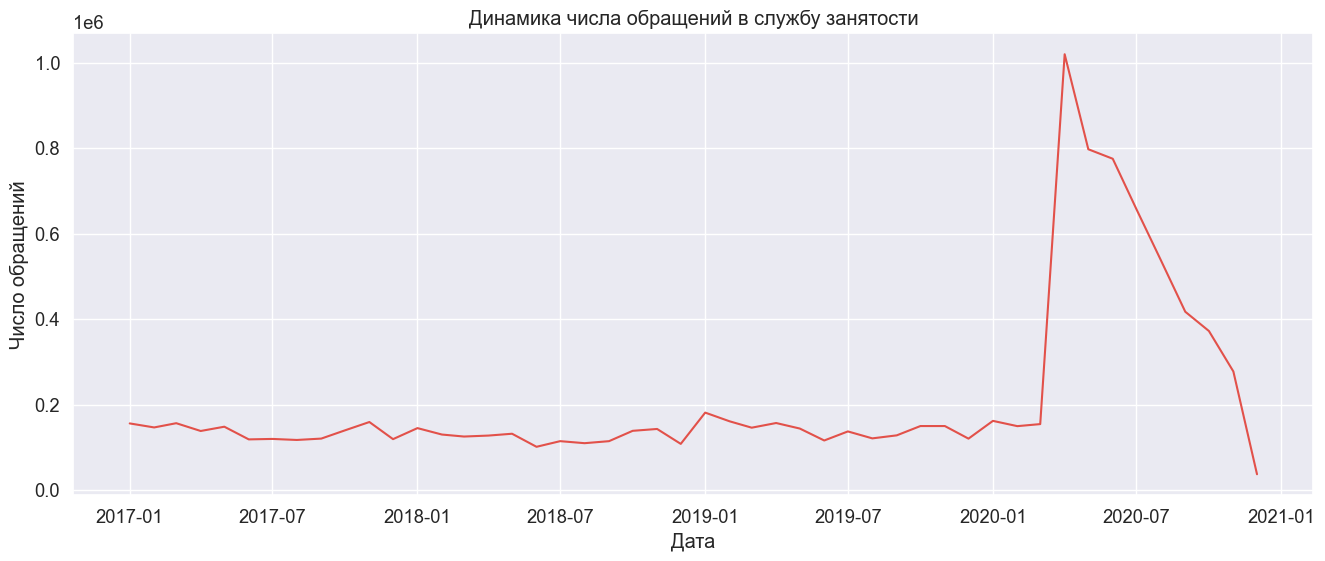

In [18]:
#построим график
plt.figure(figsize=(16, 6))
sns.lineplot(data=appeals, x='month_application', y='count')
#оформим заголовки
plt.title('Динамика числа обращений в службу занятости')
plt.xlabel('Дата')
plt.ylabel('Число обращений')
plt.show()

На графике видно резкий скачок в период с декабря 2020 года. Именно в это время происходило распространение ковида в Российской Федерации. Укрупним рассматриваемый период до годов, построим график для наглядности.

In [19]:
#сгруппируем данные по годам и посчитаем число обращений
appeals_year = data.groupby('year')['count'].sum().reset_index()
print(f'Динамика числа обращений в службу занятости по годам \n{appeals_year.to_string(header=False)}')

Динамика числа обращений в службу занятости по годам 
0  2017  1636952
1  2018  1486267
2  2019  1708624
3  2020  5358371


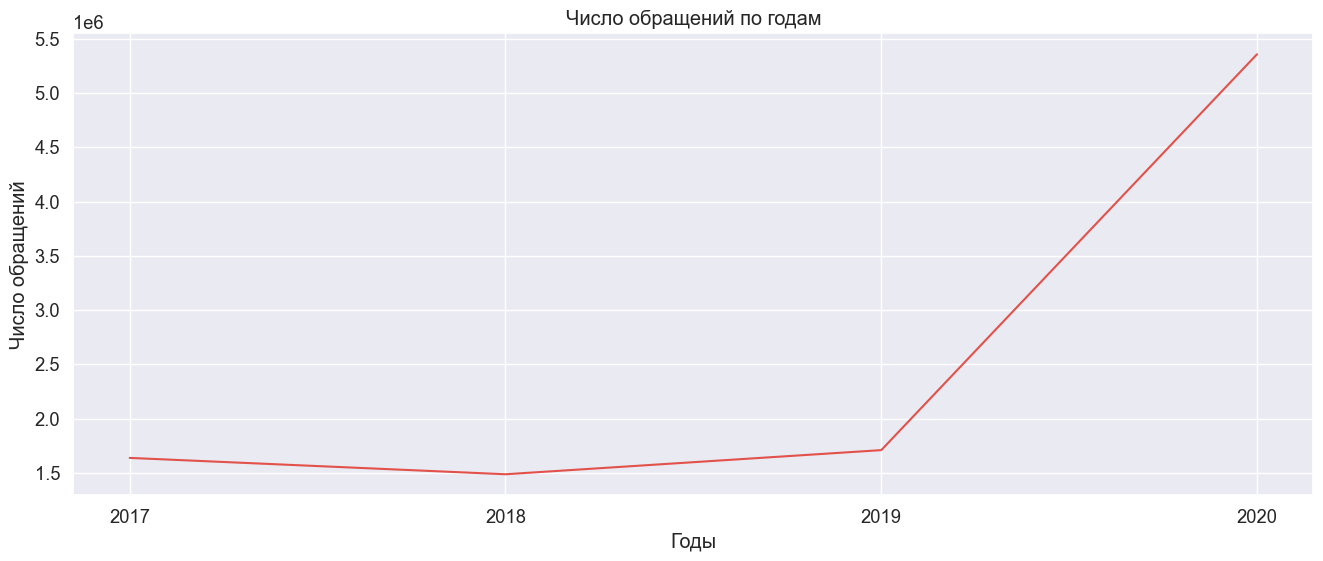

In [20]:
#построим график по годам 
plt.figure(figsize=(16, 6))
sns.lineplot(data=appeals_year, x='year', y='count')
plt.xticks(appeals_year['year'][::1])
plt.title('Число обращений по годам')
plt.xlabel('Годы')
plt.ylabel('Число обращений')
plt.show()

Данный график подтверждает сказанное выше. В 2020 наблюдается резкий скачок обращений в службу занятости. Это происходит из-за повсеместного распространения пандемии в мире. Рассмотрим число повторных обращений и сравним их с предыдущим результатом.

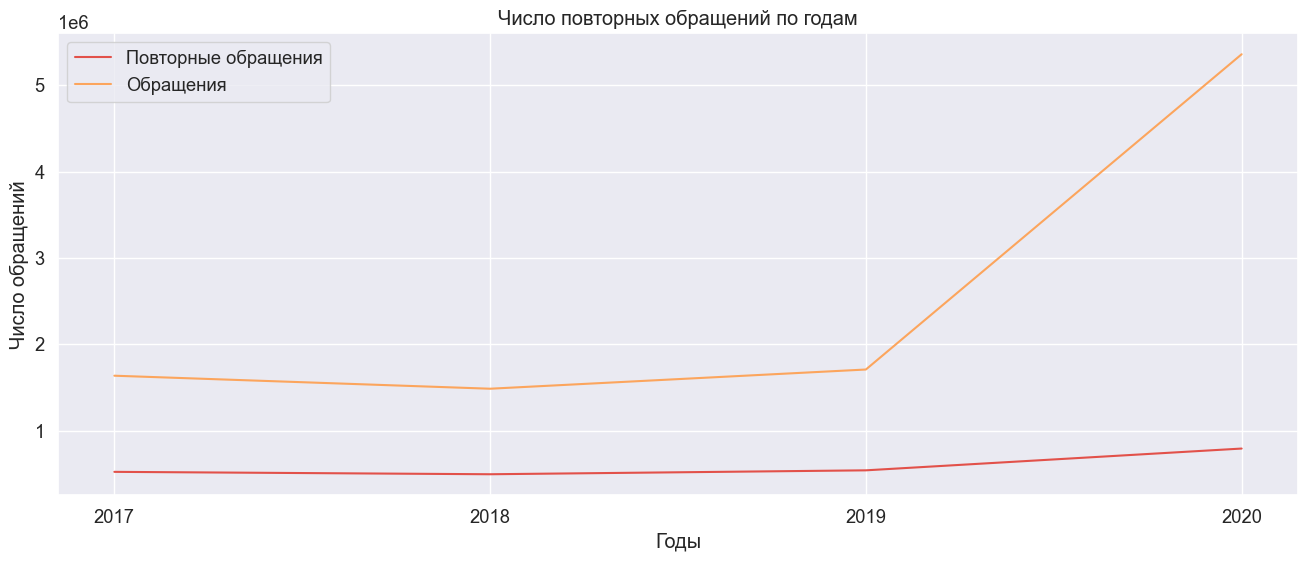

In [21]:
#сгруппируем данные по столбцу повторных обращений и построим график, добавив его к предыдущему
repeat = data.groupby('year')['hc_repeat'].sum().reset_index()
plt.figure(figsize=(16, 6))
sns.lineplot(data=repeat, x='year', y='hc_repeat', label='Повторные обращения')
sns.lineplot(data=appeals_year, x='year', y='count', label='Обращения')
plt.xticks(appeals_year['year'][::1])
#оформим заголовки
plt.title('Число повторных обращений по годам')
plt.xlabel('Годы')
plt.ylabel('Число обращений')
plt.legend()
plt.show()

Число повторных обращений также увеличилось в 2020 году, однако в данной динамике не наблюдался резкий скачок, как у числа обращений. Причинами такого расхождения могли быть полярные события:
1. Компетентность работы служб занятости по поиску трудоустройства для людей и удовлетворенность тех, кто обратился за помощью.
2. Неудовлетворение работой служб занятости и нежелание обращаться туда повторно.

<b>Таким образом, можно сделать следущие выводы:<b/>
   1. Самое большое число обращений в службу занятости в 2020 году. В это время наблюдается резкий скачок. Причина этого - пандемия коронавируса, которая началась в 2020 году. Люди теряли работу в связи с введением дистанционки и ограничительных мер, поэтому были вынуждены обращаться в службу занятости. 
   2. По годам - самое большое число обращений в 2020 году. Можно предположить, что такое резкое увеличение было также из-за пандемии ковида. Люди не могли сами найти работу и обращались в специальные службы. 
   3. Аналогичные выводы можно сделать и по графику повторных обращений. В 2020 году люди чаще обращались в службу занятости. Из-за ковида предложение рабочих место сократилось, что привело к такому росту.

Проведем исследование, которое направленно на изучение возрастных групп.

Text(0, 0.5, 'Число обращений')

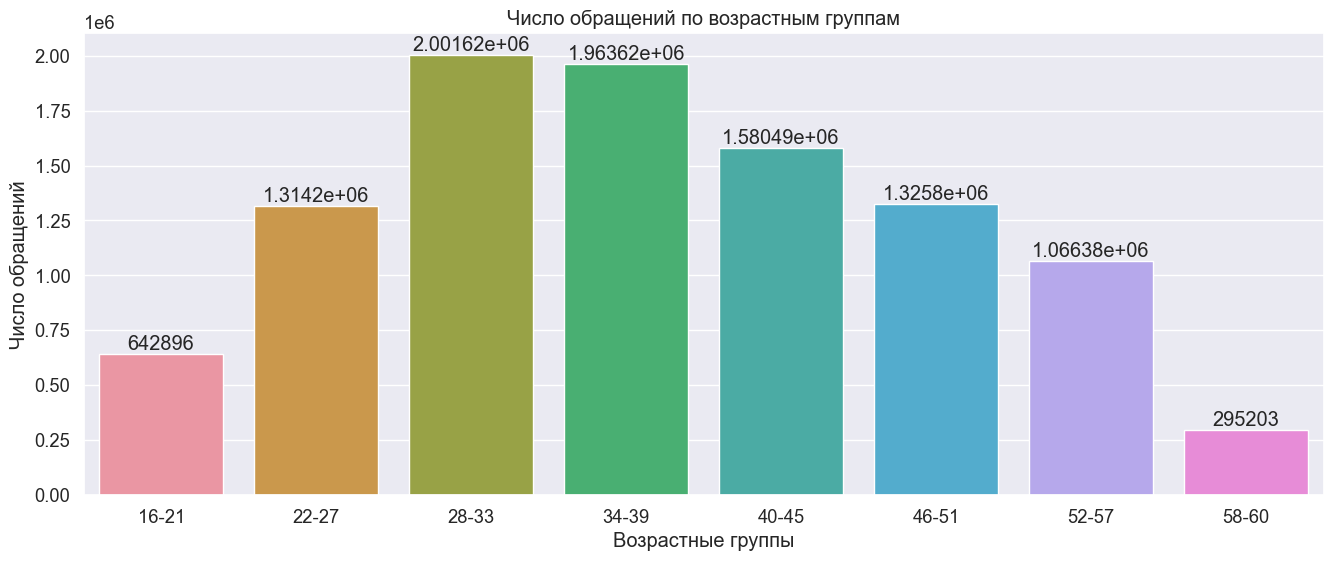

In [22]:
#2 сгруппируем данные по возрасту и построим график
plt.figure(figsize=(16, 6))
age_data = data.groupby('age')['count'].sum().reset_index()
plot = sns.barplot(data=age_data, x='age', y='count')
#создаем метки
plot.bar_label(plot.containers[0])
#оформим заголовки
plt.title('Число обращений по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Число обращений')

Наибольшее число обращений относится к возрастной группе 28-33 и 34-39. Это средний возраст работающих людей. На данном этапе человек уже закончил обучение, не близок к пенсии и нуждается в постоянной и оплачиваемой работе. Поэтому данная возрастная группа будет наиболее многочисленна по кол-ву обращений в службу занятости. </br>
Теперь посмотрим соотношение возрастных групп по каждому году.

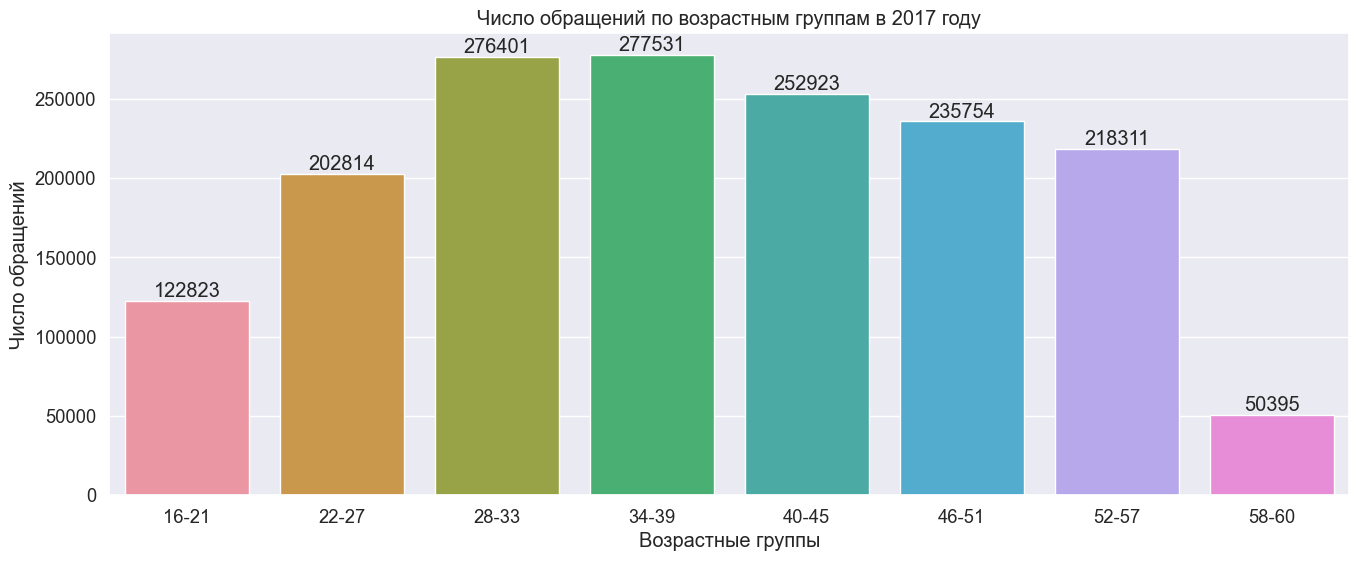

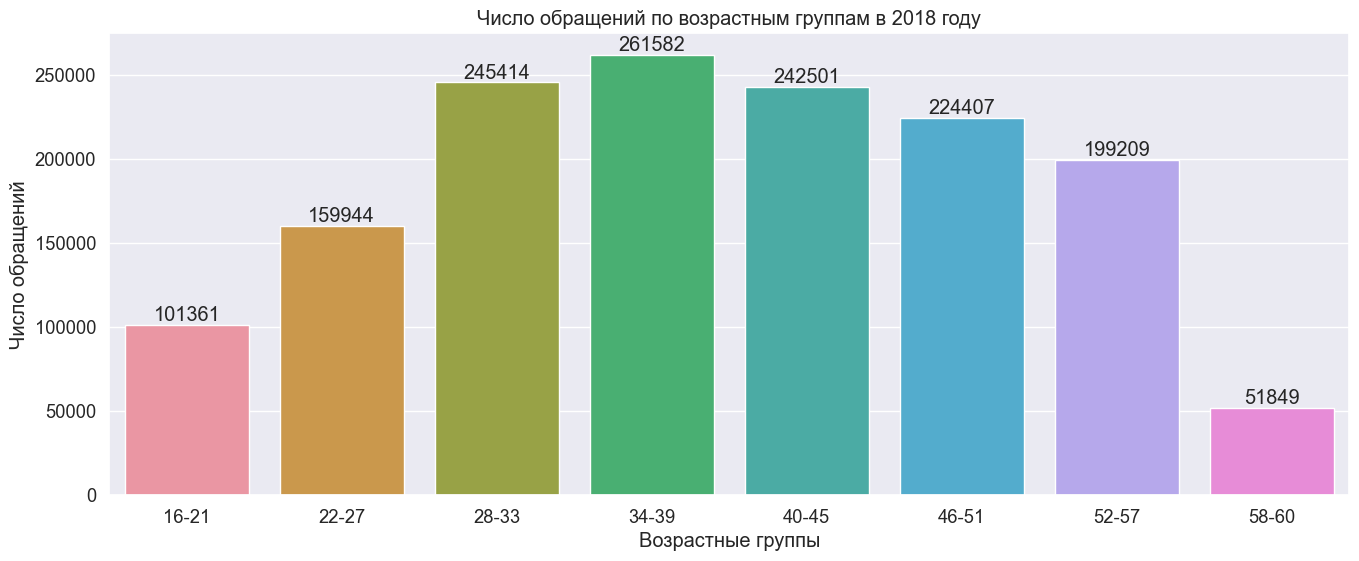

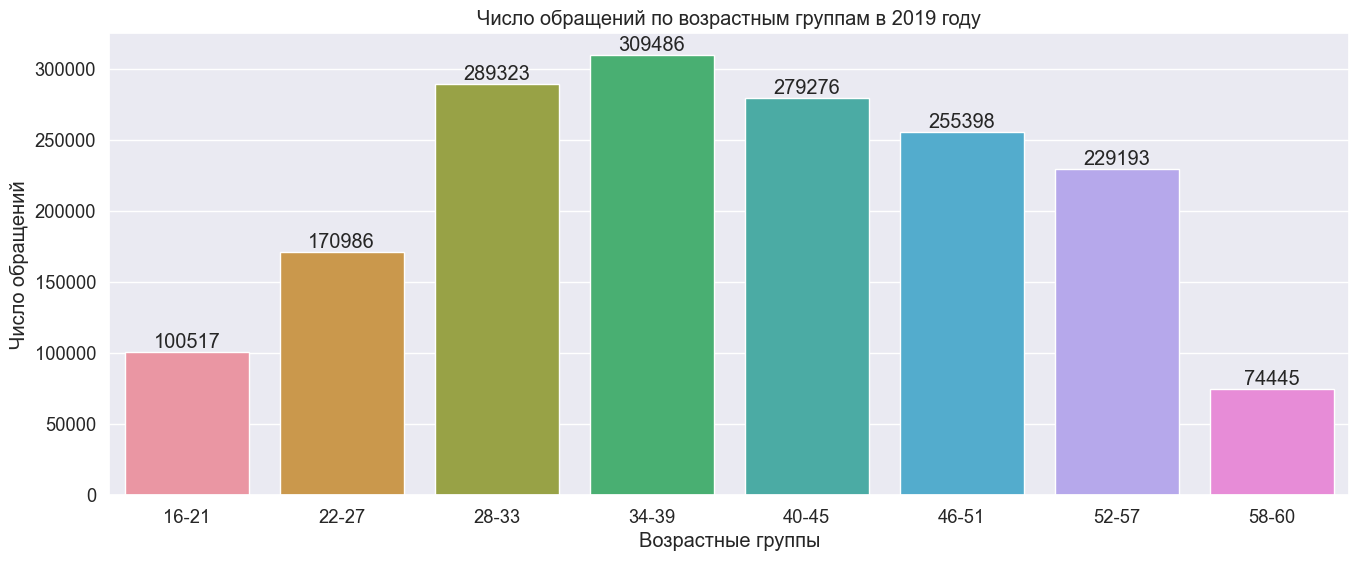

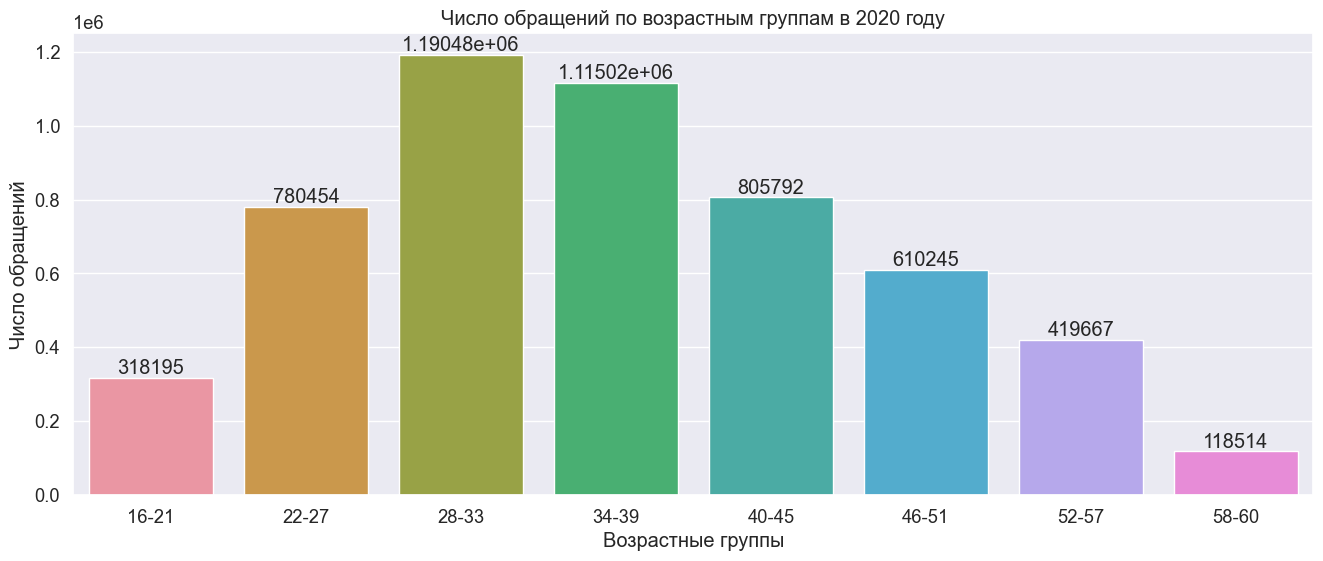

In [23]:
#2.1 с помощью цикла выведем графики для каждого года
for i in data['year'].unique():
    plt.figure(figsize=(16, 6))
    year_data = data.loc[data['year'] == i]
    age_data = year_data.groupby('age')['count'].sum().reset_index()
    plot = sns.barplot(data=age_data, x='age', y='count')
    #создаем метки
    plot.bar_label(plot.containers[0])
    #выводим
    plt.title(f'Число обращений по возрастным группам в {i} году')
    plt.xlabel('Возрастные группы')
    plt.ylabel('Число обращений')
    plt.show()

В общем и целом, соотношение возрастных групп практически не меняется в зависимости от года. В числе лидеров также находятся возраст от 28 до 39 лет. Однако стоит заметить, что в 2020 году происходит сильное увеличение числа обращений не только по средне-возрастным группам, а по всем представленным возрастным интервалам. Опять же это объясняется началом пандемии.

<b>Вывод:<b/>
   1. Наибольшее число обращений в службу занятости приходится на возраст 28-33 лет.
В целом, чаще в службу занятости обращаются люди среднего возраста от 28 до 45 лет. 
   2. Самое маленькое число обращений - это 16-21 и 58-60. Первое объясняется тем, что многие люди в этом возрасте еще проходят обучение, поэтому если у них есть потребность в работе, скорее всего, она будет неофициальная. Маленькое кол-во обращений в возрасте 58-60 является следствием скорого ухода на пенсию.
   3. Почти во всех годах лидирующей возрастной группой была 34-39, однако в 2020 году число обращений людей с возрастом 28-33 превысило число человек с возрастом 34-39. Можно предположить, что это произошло потому, что при сокращении во время ковида были уволены люди с более низким рабочим стажем, тогда как люди возраста 34-39 все же сохраняли свои рабочие места.

Исследуем соотношение трудоустройства по данному датасету

In [24]:
#3 считаем сколько человек устроилось на работу, а также их процент (округляем до 2-ух знаков)
employed = data[data['find_new_job'] == True]
num_employed = employed['count'].sum()
percent_employed = num_employed / data['count'].sum() * 100
print('Число устроившихся на работу -', num_employed, ', процент устроившихся -', round(percent_employed, 2))

Число устроившихся на работу - 3576669 , процент устроившихся - 35.1


Text(0, 0.5, 'Количество человек')

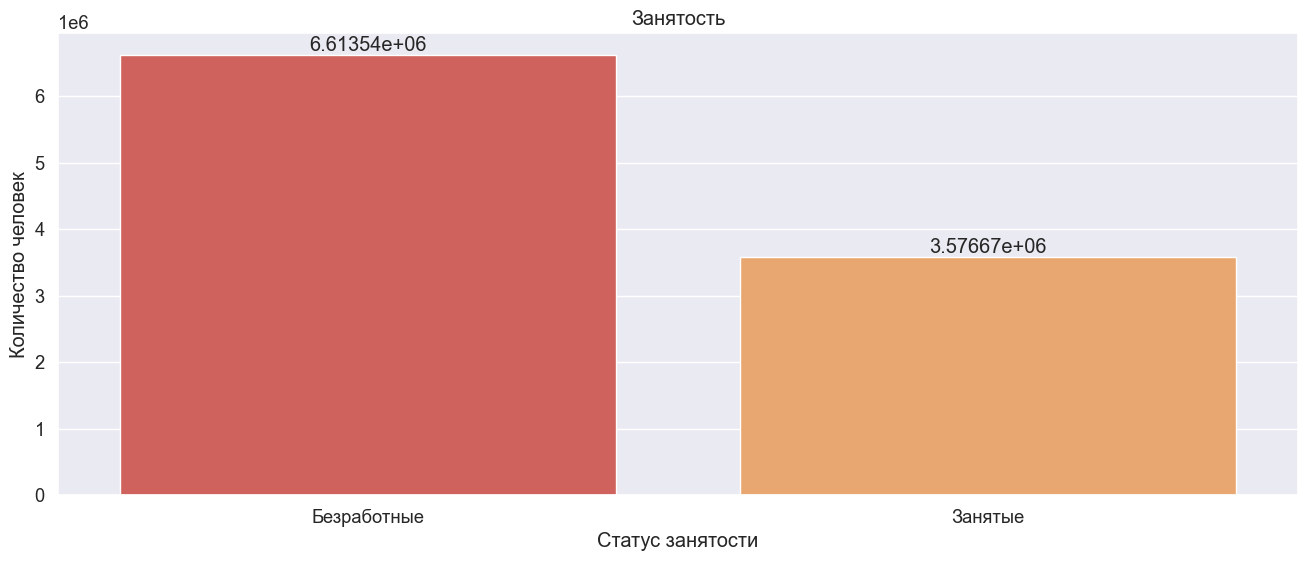

In [25]:
#группируем по занятым и безработных
new_job_data = data.groupby('find_new_job')['count'].sum().reset_index()
#создадим список, чтобы сделать подписи на графике
list1 = ['Безработные', 'Занятые']
#построим диаграмму
plt.figure(figsize=(16, 6))
plot = sns.barplot(data=new_job_data, x='find_new_job', y='count')
#создаем метки
plot.bar_label(plot.containers[0])
plot.set_xticklabels(list1)
plt.title('Занятость')
plt.xlabel('Статус занятости')
plt.ylabel('Количество человек')

<b>Вывод:</b></br>
Таким образом, можно увидеть, что число ненашедших себе новую работу превышает кол-во людей, которые устроились. Нельзя точно определить причину этого. Возможно, большое число неустровшихся людей можно объяснить тем, что они встали на биржу труда для получения МРОТ, пособий. Возможно, служба занятости некомпетенто исполняет свои обязанности и не может предоставить работу в том количестве, в котором она требуется. 

Детализируем исследование, рассмотрев соотношение занятых и безработных по годам.

In [26]:
#4 определим теперь, сколько человек устроились на работу и не устроились на нее, сгруппировав данные по годам
pivot_table = data.pivot_table(index='year', columns='find_new_job', values='count', aggfunc='sum')
#переименуем столбцы
pivot_table = pivot_table.rename(columns={0: 'unemployed', 1: 'employed'})
pivot_table

find_new_job,unemployed,employed
year,,
2017,761183,875769
2018,696596,789671
2019,894743,813881
2020,4261023,1097348


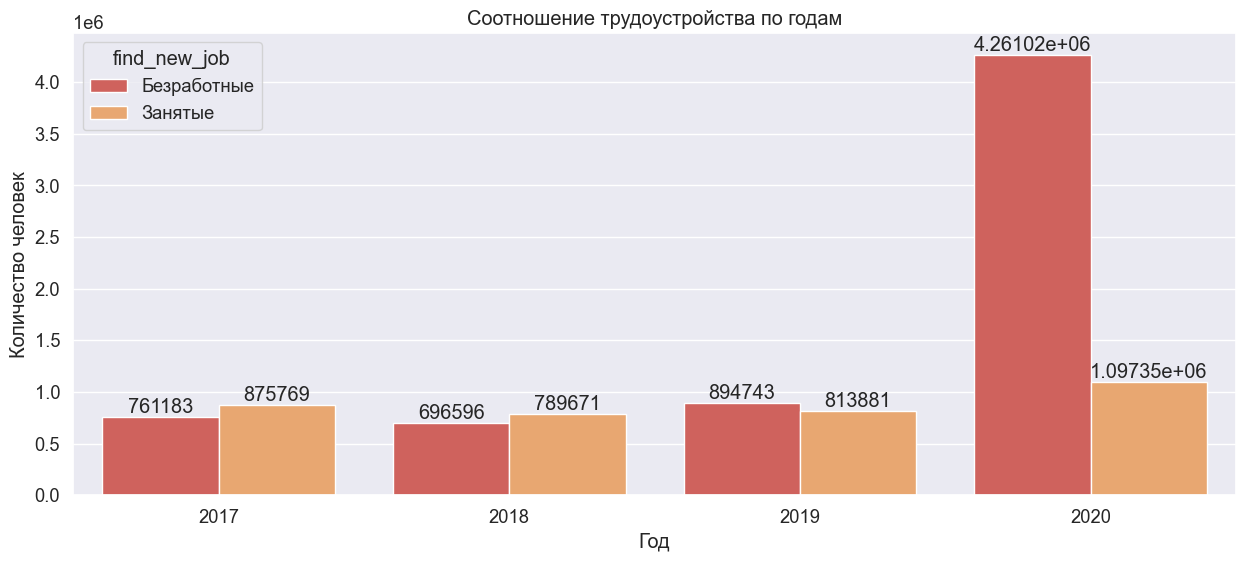

In [27]:
#группируем данные по годам и статусу занятости
pivot_table = data.groupby(['year', 'find_new_job'])['count'].sum().reset_index()
#создаём словарь для замены значений
replace_dict = {False: 'Безработные', True: 'Занятые'}
pivot_table = pivot_table.replace(replace_dict)
#построим график
plt.figure(figsize=(15, 6))
plot = sns.barplot(data=pivot_table, x='year', y='count', hue='find_new_job')
#создаем метки
for i in plot.containers:
    plt.bar_label(i)
plt.title('Соотношение трудоустройства по годам')
plt.xlabel('Год')
plt.ylabel('Количество человек')
plt.show()

На графике видно резкое увеличение соотношения между занятыми и безработными в 2020 году. Посмотрим процентное соотношение. 

In [28]:
#4.1 определим теперь процент, также сгруппировав данные по годам
pivot_table = data.pivot_table(index='year', columns='find_new_job', values='count', aggfunc='sum')
pivot_table = pivot_table.rename(columns={0: 'unemployed', 1: 'employed'})
for year in pivot_table.index:
    #определяем общее значение для каждого года
    total = data[data['year']==year]['count'].sum()
    #добавляем новые столбцы
    pivot_table.loc[year, 'unemployed_percent'] = round(pivot_table.loc[year, 'unemployed'] / total * 100, 2)
    pivot_table.loc[year, 'employed_percent'] = round(pivot_table.loc[year, 'employed'] / total * 100, 2)
pivot_table.reset_index()


find_new_job,year,unemployed,employed,unemployed_percent,employed_percent
0,2017,761183,875769,46.50,53.50
1,2018,696596,789671,46.87,53.13
2,2019,894743,813881,52.37,47.63
3,2020,4261023,1097348,79.52,20.48


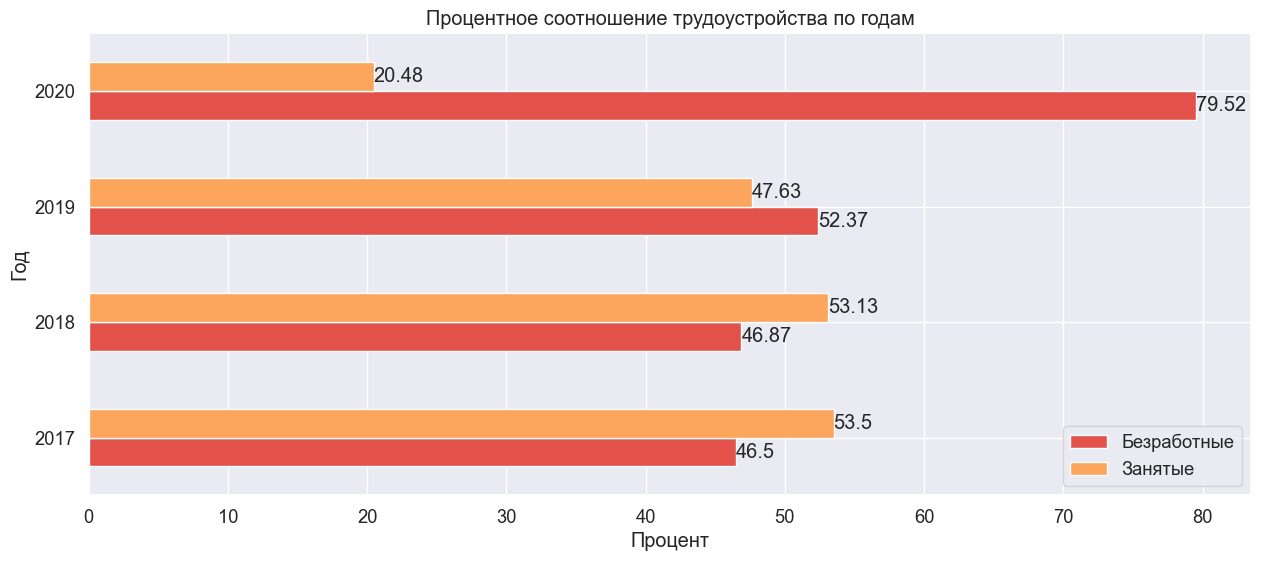

In [29]:
#построим график
plot = pivot_table[['unemployed_percent', 'employed_percent']].plot(kind='barh', figsize=(15, 6))
#создаем метки
for i in plot.containers:
    plt.bar_label(i)
plt.title('Процентное соотношение трудоустройства по годам')
plt.xlabel('Процент')
plt.ylabel('Год')
plt.legend(['Безработные', 'Занятые'])
plt.show()

<b>Вывод:</b></br>
1. Количество безработных и занятых в 2017, 2018, 2019 годах колеблется около среднего уровня (50%). Отклонения от этого числа незначительные.
2. Основное различие в соотношении наблюдается в 2020 году. Количество безработных резко увеличивается до 80%. Это объясняется опять же началом пандемии. Многие теряли свою работу и были вынуждены обращаться в службу занятости.

Теперь проведем исследование, изучив гендерное соотношение и распределение по типу образования.

In [30]:
#5 сгруппируем по полу и посчитаем кол-во 
gender = data.groupby('gender')['count'].sum()
print(f'Категоризация по столбцу пола \n{gender.to_string(header=False)}')

Категоризация по столбцу пола 
0    5585350
1    4604856
2          8


In [31]:
#очистим, чтобы на графике не отображались ненужные данные
gender_clear = data.query('gender != 2')
gender = gender_clear.groupby('gender')['count'].sum()
print(f'Категоризация по столбцу пола \n{gender.to_string(header=False)}')

Категоризация по столбцу пола 
0    5585350
1    4604856


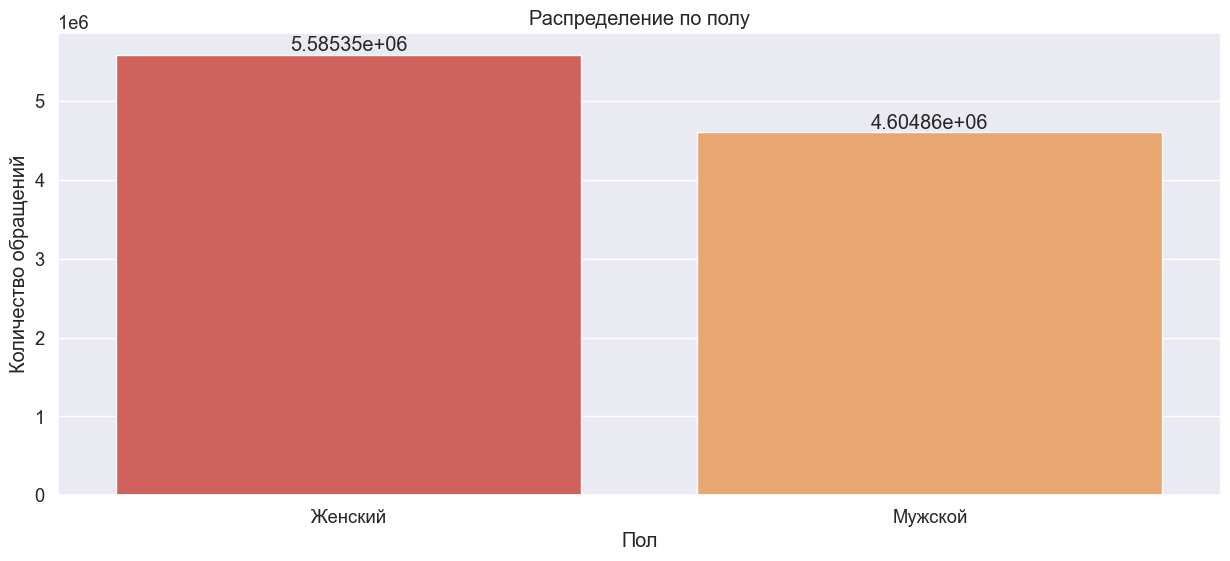

In [32]:
#построим график
gender = gender_clear.groupby('gender')['count'].sum().reset_index()
list1 = ['Женский', 'Мужской']
plt.figure(figsize=(15, 6))
plot = sns.barplot(data=gender, x='gender', y='count')
#создаем метки
plot.bar_label(plot.containers[0])
plot.set_xticklabels(list1)
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество обращений')
plt.show()

Гендерное соотношение находится практически на одном уровне. Немного превалирует женский пол. По 8 обращениям пол неизвестен, однако этими данными можно пренебречь. Я могу объяснить данное расхождение тем, что в общем и целом число женщин превышает число мужчин по стране.

In [33]:
#сгруппируем по образованию и посчитаем кол-во 
education = data.groupby('education')['count'].sum().sort_values(ascending=False)
print(f'Категоризация по столбцу образования \n{education.to_string(header=False)}')

Категоризация по столбцу образования 
4    2555969
3    2174288
0    2138103
6    1561037
2    1431099
9     321852
1       7866


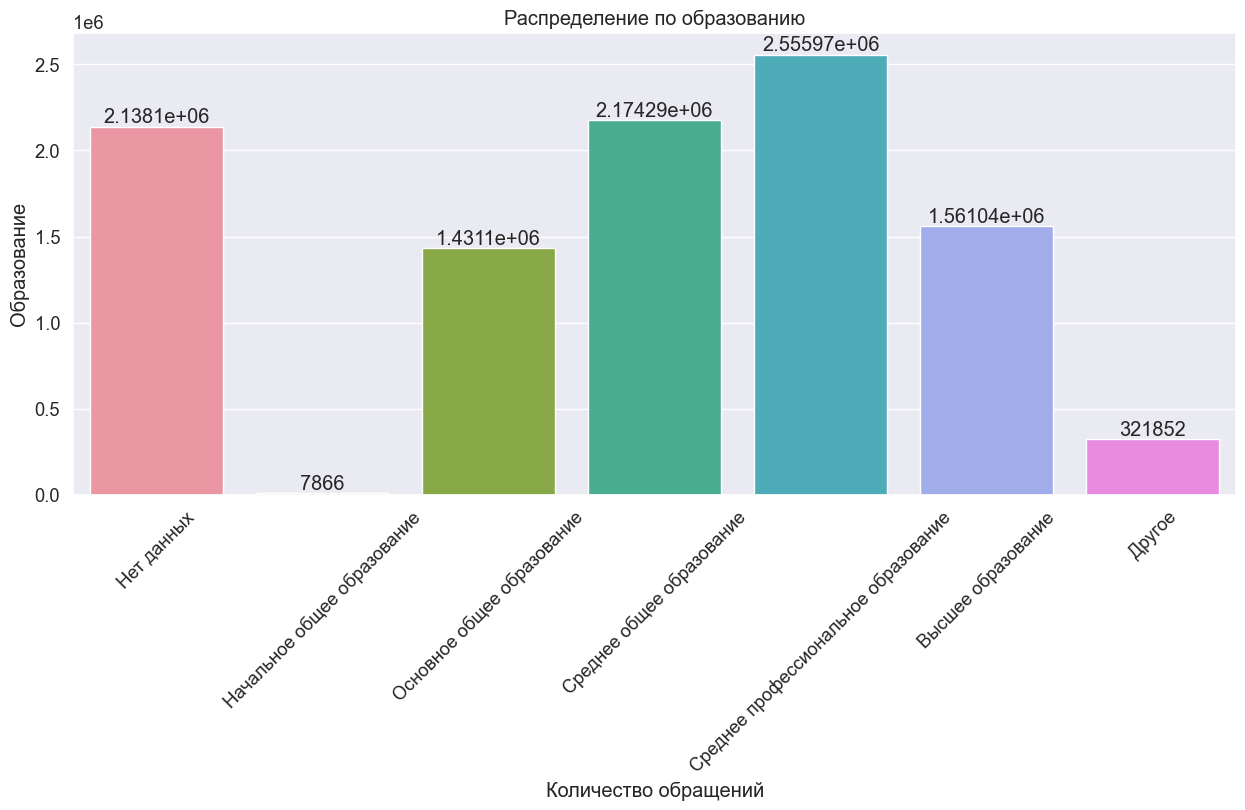

In [34]:
#построим график
education = education.reset_index()
list1 = ['Нет данных', 'Начальное общее образование', 'Основное общее образование', 'Cреднее общее образование', 'Cреднее профессиональное образование', 'Высшее образование', 'Другое']
plt.figure(figsize=(15, 6))
plot = sns.barplot(data=education, x='education', y='count')
#создаем метки
plot.bar_label(plot.containers[0])
plot.set_xticklabels(list1, rotation=45)
plt.title('Распределение по образованию')
plt.ylabel('Образование')
plt.xlabel('Количество обращений')
plt.show()

Набольшее число обращений у людей со средним проф. образованием, со средним общим образованием. Можно предположить, что на бирже труда большее кол-во вакансий для среднего образования, именно поэтому чило обращений людей, которые закончили среднее образование превалирует. Также по большому кол-ву людей тип образования неизвестен. Возможно, люди не захотели раскрывать информацию об их обучении, либо датасет имеет ошибку, которую невозможно исправить.

In [35]:
#сгруппируем по образованию людей, которые ранее официально не работали
notwork = data[data['hc_didnotwork'] == True].groupby('education')['count'].sum().sort_values(ascending=False)
print(f'Категоризация по столбцу образования \n{notwork.to_string(header=False)}')

Категоризация по столбцу образования 
3    540559
2    387410
4    356212
6    144917
9    120817
0     84118
1      1556


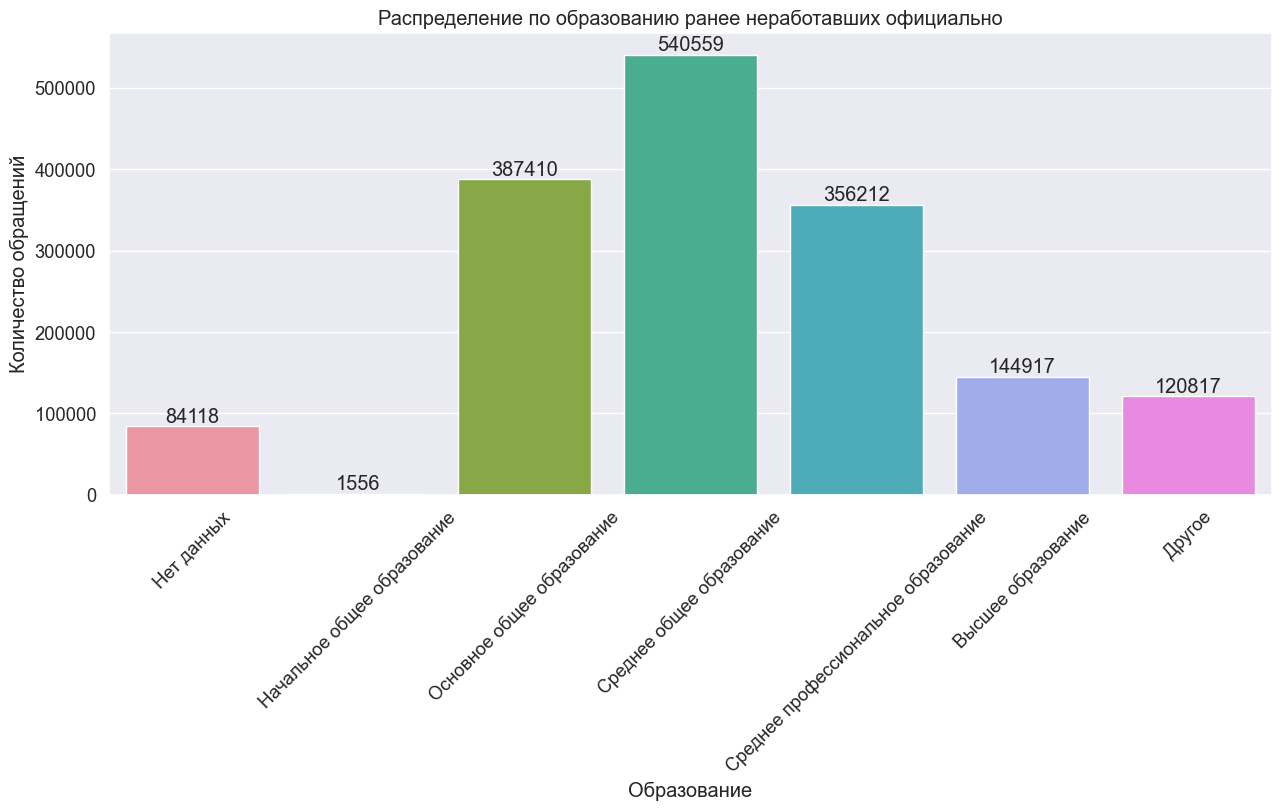

In [36]:
#построим график
notwork = notwork.reset_index()
list1 = ['Нет данных', 'Начальное общее образование', 'Основное общее образование', 'Cреднее общее образование', 'Cреднее профессиональное образование', 'Высшее образование', 'Другое']
plt.figure(figsize=(15, 6))
plot = sns.barplot(data=notwork, x='education', y='count')
#создаем метки
plot.bar_label(plot.containers[0])
plot.set_xticklabels(list1, rotation=45)
plt.title('Распределение по образованию ранее неработавших официально')
plt.xlabel('Образование')
plt.ylabel('Количество обращений')
plt.show()

Аналогичная ситуация прослеживается и у числа обращений людей, которые ранее официально не работали. Однако следует отметить, что теперь кол-во человек с неизвестным типом образования значительно меньше.

In [37]:
#посмотрим соотношение устровшихся и безработных по разлчиным уровням образования, создав сводную таблицу для удобства
pivot_table = data.pivot_table(index='education', columns='find_new_job', values='count', aggfunc='sum')
#переименуем столбцы
pivot_table = pivot_table.rename(columns={0: 'unemployed', 1: 'employed'})
pivot_table.sort_values(by='unemployed', ascending=False)

find_new_job,unemployed,employed
education,,
3,1533466,640822
4,1530016,1025953
0,1420778,717325
2,990637,440462
6,886797,674240
9,246037,75815
1,5814,2052


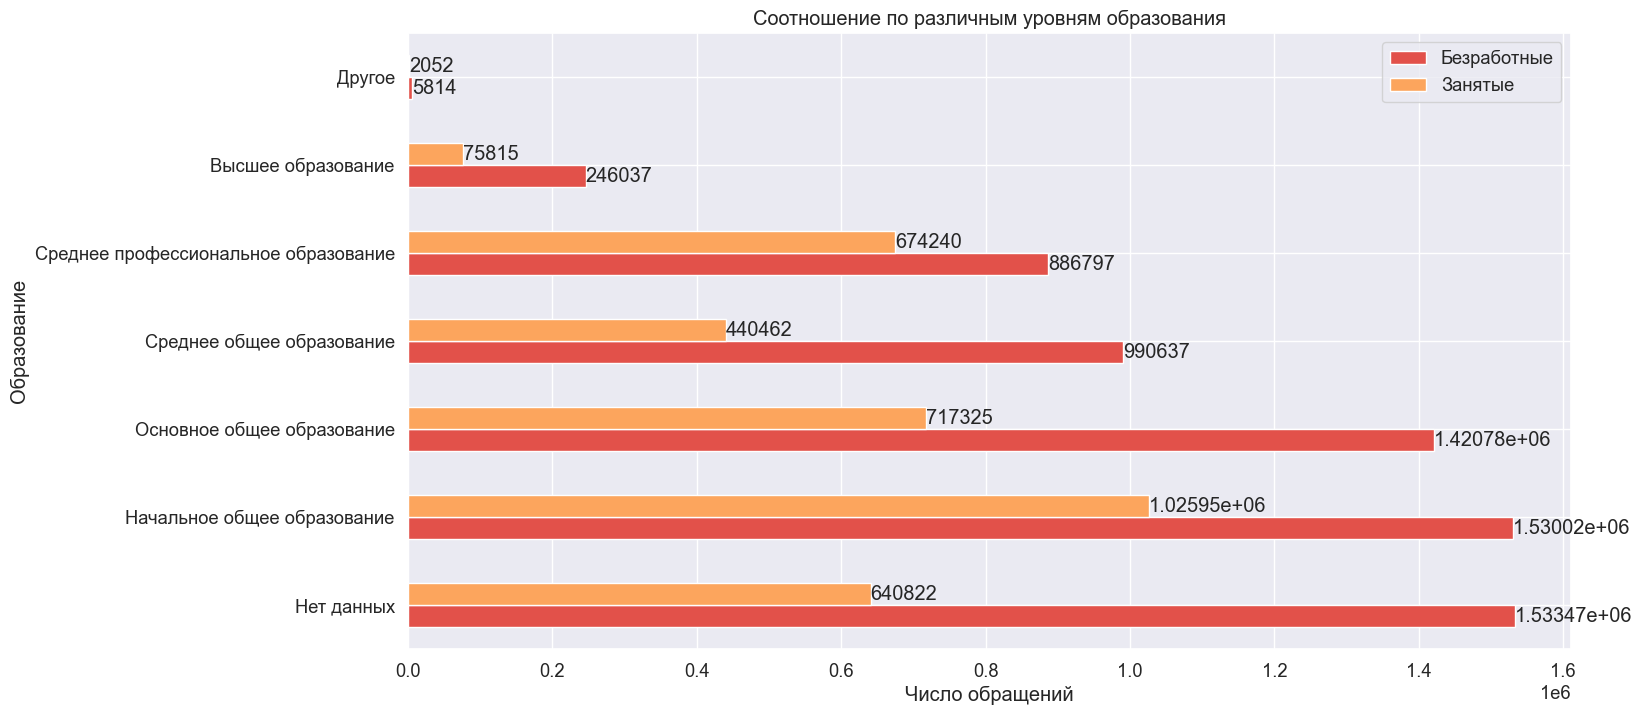

In [38]:
#построим график
pivot_table_new = pivot_table.sort_values(by='unemployed', ascending=False).reset_index()
#создаём словарь для замены значений
list1 = ['Нет данных', 'Начальное общее образование', 'Основное общее образование', 'Cреднее общее образование', 'Cреднее профессиональное образование', 'Высшее образование', 'Другое']
#построим график
plot = pivot_table_new[['unemployed', 'employed']].plot(kind='barh', figsize=(15, 8))
#создаем метки
for i in plot.containers:
    plt.bar_label(i)
#выводим обозначения
plot.set_yticklabels(list1)
#называем оси и даем название графику
plt.title('Соотношение по различным уровням образования')
plt.xlabel('Число обращений')
plt.ylabel('Образование')
plt.legend(['Безработные', 'Занятые'])
plt.show()

Общее соотношение безработных и нанятых по разлчиным типам образования имеет определенную схожесть. Число безработных превышает число занятых. 

<b>Вывод:</b>
1. Число женщин, которые подали заявления в службу занятости, больше чем мужчин. Причина этого: соотношение женского и мужского пола по всему населению планеты. Известно, что женщин как правило больше.
2. Чаще подают заявления люди со средним профессиональным образованием. Также можно отметить, что большое число человек имеют среднее общее образование. Количество тех, кто встает на биржу труда с основным общим образованием больше, нежели людей с высшим образованием. Самое маленькое число - с начальным общим образованием. Причина этого: люди продолжают учебу, за исключением некоторых случаев.
3. Люди, которые ранее официально не работали, в большинстве случаев имеют среднее профессиональное образование. Следует отметить, что здесь число человек с основным общим образованием больше, нежели с средним общим образованием. Скорее всего это объясняется достижением трудоспособного возраста. Человек, который окончил только основное общее, как правило, моложе и будет устраиваться на работу впервые, в отличие от человека со средним общим. 
4. Как можно заметить, число еще не устровшихся на работу превосходит число устроившихся по всем видам полученного образования. Отсюда следует, что зависимость в соотношении приема на работу отсутствует.

Рассмотрим данные подробнее, изучив отдельные моменты.

In [39]:
#6 создадим срез данных с помощью метода query для 2020 года без декабря
data_without_december = data.query('year == 2020 and month != 12')
#проверим
data_num = data['count'].sum()
data_num_new = data_without_december['count'].sum()
print(f'Кол-во строк в изначальном датасете - {data_num}, кол-во строк в новом срезе - {data_num_new}')

Кол-во строк в изначальном датасете - 10190214, кол-во строк в новом срезе - 5321660


In [40]:
#6.1 создаем сводную таблицу для подсчета числа безработных и нашедших работу по месяцам
pivot_table = data_without_december.pivot_table(index='month', columns='find_new_job', values='count', aggfunc='sum')
#переименуем столбцы
pivot_table = pivot_table.rename(columns={0: 'unemployed', 1: 'employed'})
pivot_table

find_new_job,unemployed,employed
month,,
1,98098,63615
2,96326,53040
3,104349,49817
4,720765,299564
5,577112,220721
6,622049,153530
7,545431,112190
8,465067,73088
9,374197,43106


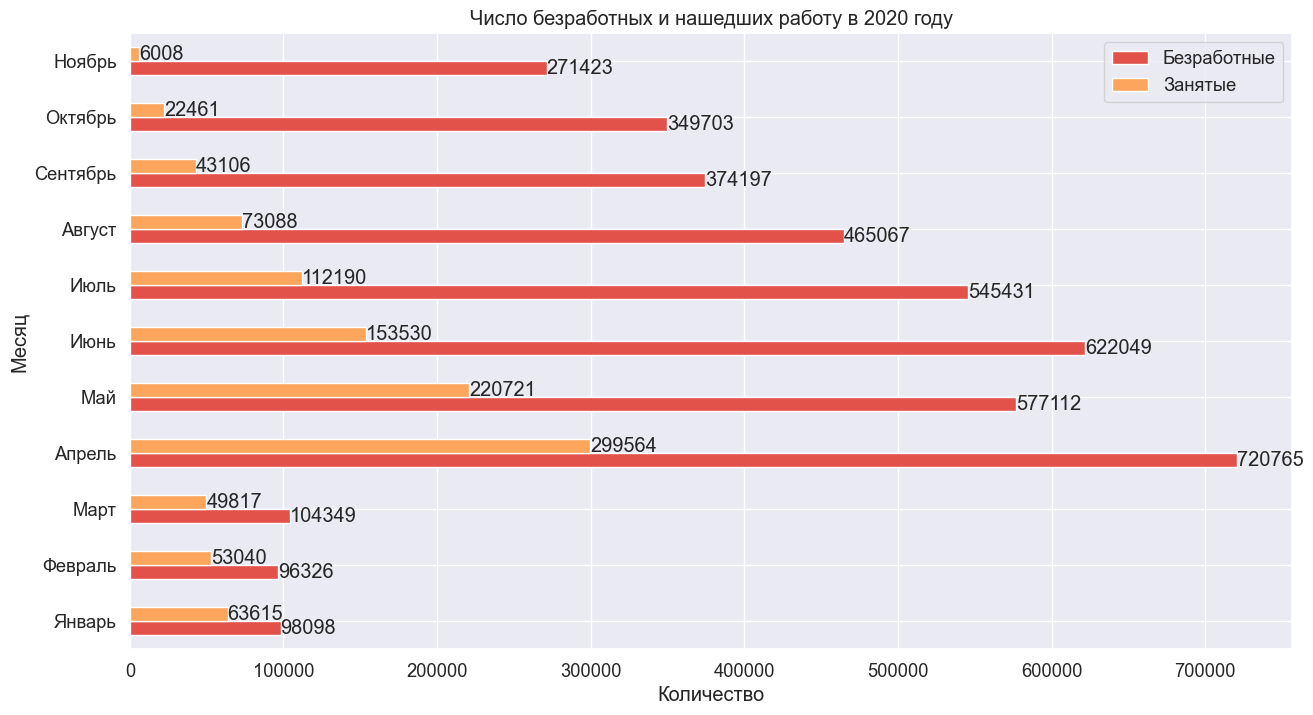

In [41]:
#построим график
pivot_table.reset_index()
#создаём словарь для замены значений
list1 = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь']
#построим график
plot = pivot_table[['unemployed', 'employed']].plot(kind='barh', figsize=(15, 8))
#создаем метки
for i in plot.containers:
    plt.bar_label(i)
#выводим обозначения
plot.set_yticklabels(list1)
#название и подписи осей
plt.title('Число безработных и нашедших работу в 2020 году')
plt.xlabel('Количество')
plt.ylabel('Месяц')
plt.legend(['Безработные', 'Занятые'])
plt.show()

Видно, что общее число заявлений в службе занятости совершило резкий скачок в апреле. Это соответствует периоду введения ограничительных мер из-за эпидемии ковида в Российской Федерации. Таким образом, можно установить прямую зависимость между увеличением числа обращений и распространением коронавируса в стране. Также можно отметить, что начиная с апреля резко изменилось соотношение между занятыми и безработными. Ранее отклонение было не столь существенным.

In [42]:
#6.2 вычисляем количество трудоустроенных мужчин и женщин
num_employed_men = data_without_december.query('find_new_job == True and gender == 1')['count'].sum()
num_employed_women = data_without_december.query('find_new_job == True and gender == 0')['count'].sum()
#вычисляем общее количество мужчин и женщин
num_men = data_without_december.query('gender == 1')['count'].sum()
num_women = data_without_december.query('gender == 0')['count'].sum()
#вычисляем процент
employment_percent_men = num_employed_men / num_men * 100
employment_percent_women = num_employed_women / num_women * 100
print(f'Доля трудоустроенных мужчин: {employment_percent_men:.2f}%')
print(f'Доля трудоустроенных женщин: {employment_percent_women:.2f}%')

Доля трудоустроенных мужчин: 21.71%
Доля трудоустроенных женщин: 19.80%


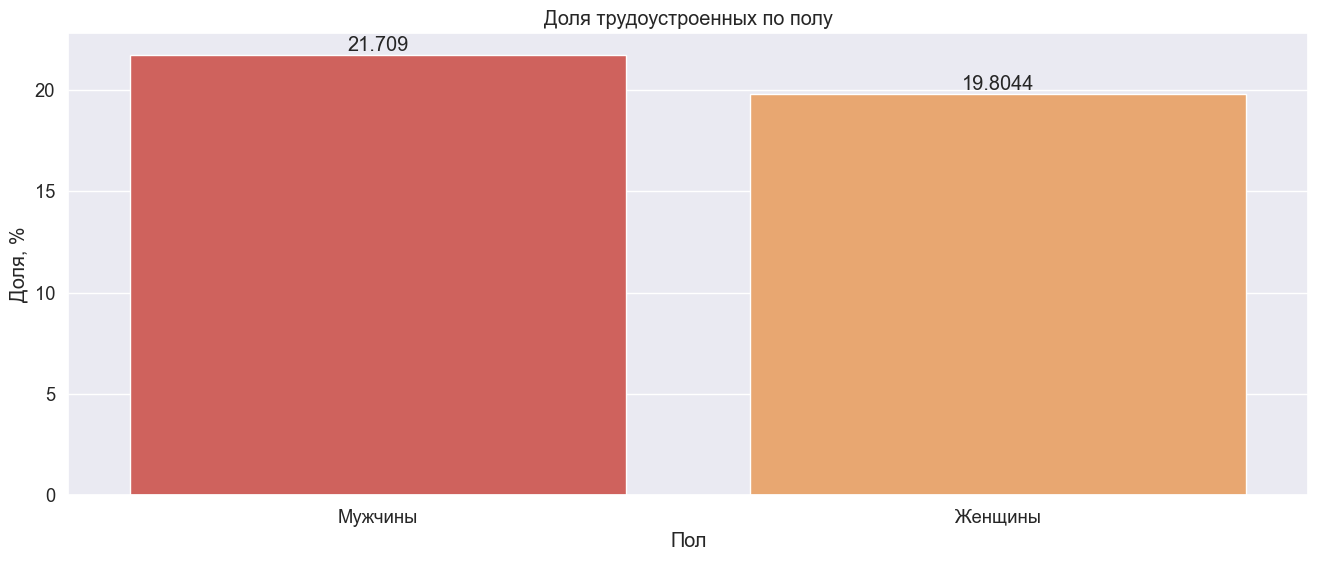

In [43]:
#построим график
plt.figure(figsize=(16, 6))
plot = sns.barplot(x=['Мужчины', 'Женщины'], y=[employment_percent_men, employment_percent_women])
#сделаем отметки значений
plot.bar_label(plot.containers[0])
plt.title('Доля трудоустроенных по полу')
plt.xlabel('Пол')
plt.ylabel('Доля, %')
plt.show()

Процентное соотношение трудоустроенных за 2020 год в сумме меньше 50%, что подтверждает наблюдения, которые были сделаны выше. 

In [44]:
#6.3 сгруппируем по округам и посчитаем значения
district = data_without_december.groupby('district')['count'].sum().reset_index()
district = district.sort_values(by='count', ascending=False)
print(f'Число обращений в службу занятости по федеральным округам: \n{district.to_string(header=False, index=False)}')

Число обращений в службу занятости по федеральным округам: 
      Приволжский федеральный округ 1048536
      Центральный федеральный округ 1029581
        Сибирский федеральный округ  718075
Северо-Кавказский федеральный округ  701329
            Южный федеральный округ  595894
  Северо-Западный федеральный округ  477798
        Уральский федеральный округ  461223
  Дальневосточный федеральный округ  289224


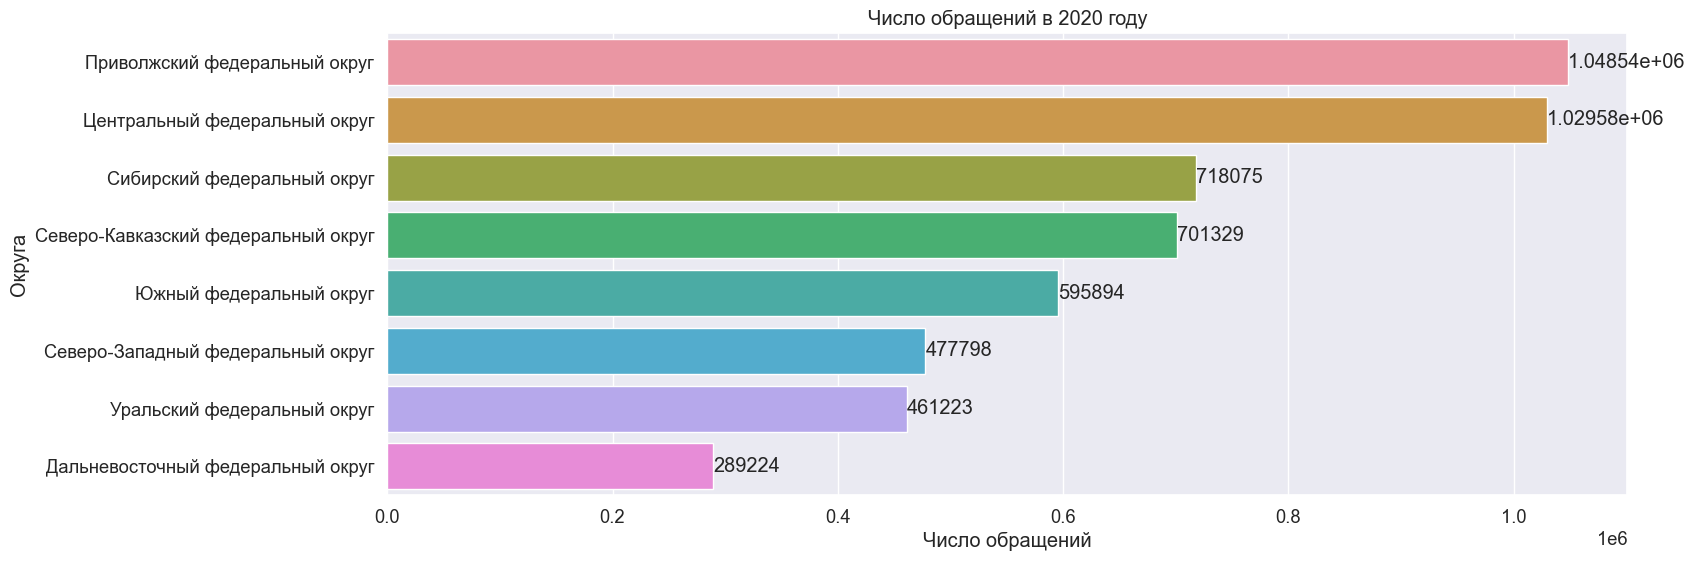

In [45]:
#построим график
plt.figure(figsize=(16, 6))
plot = sns.barplot(data=district, x='count', y='district')
plot.bar_label(plot.containers[0])
#название и подписи осей
plt.title('Число обращений в 2020 году')
plt.xlabel('Число обращений')
plt.ylabel('Округа')
plt.show()

Наиболее число обращений - в Приволжском федеральном округе, а также в Центральном федеральном округе. Можно предположить, что число обращений в службу занятости в этих регионах превышает число обращений в других регионах из-за высокой плотности населения. Большее количество людей становится причиной лидирующих позиций данных регионов.

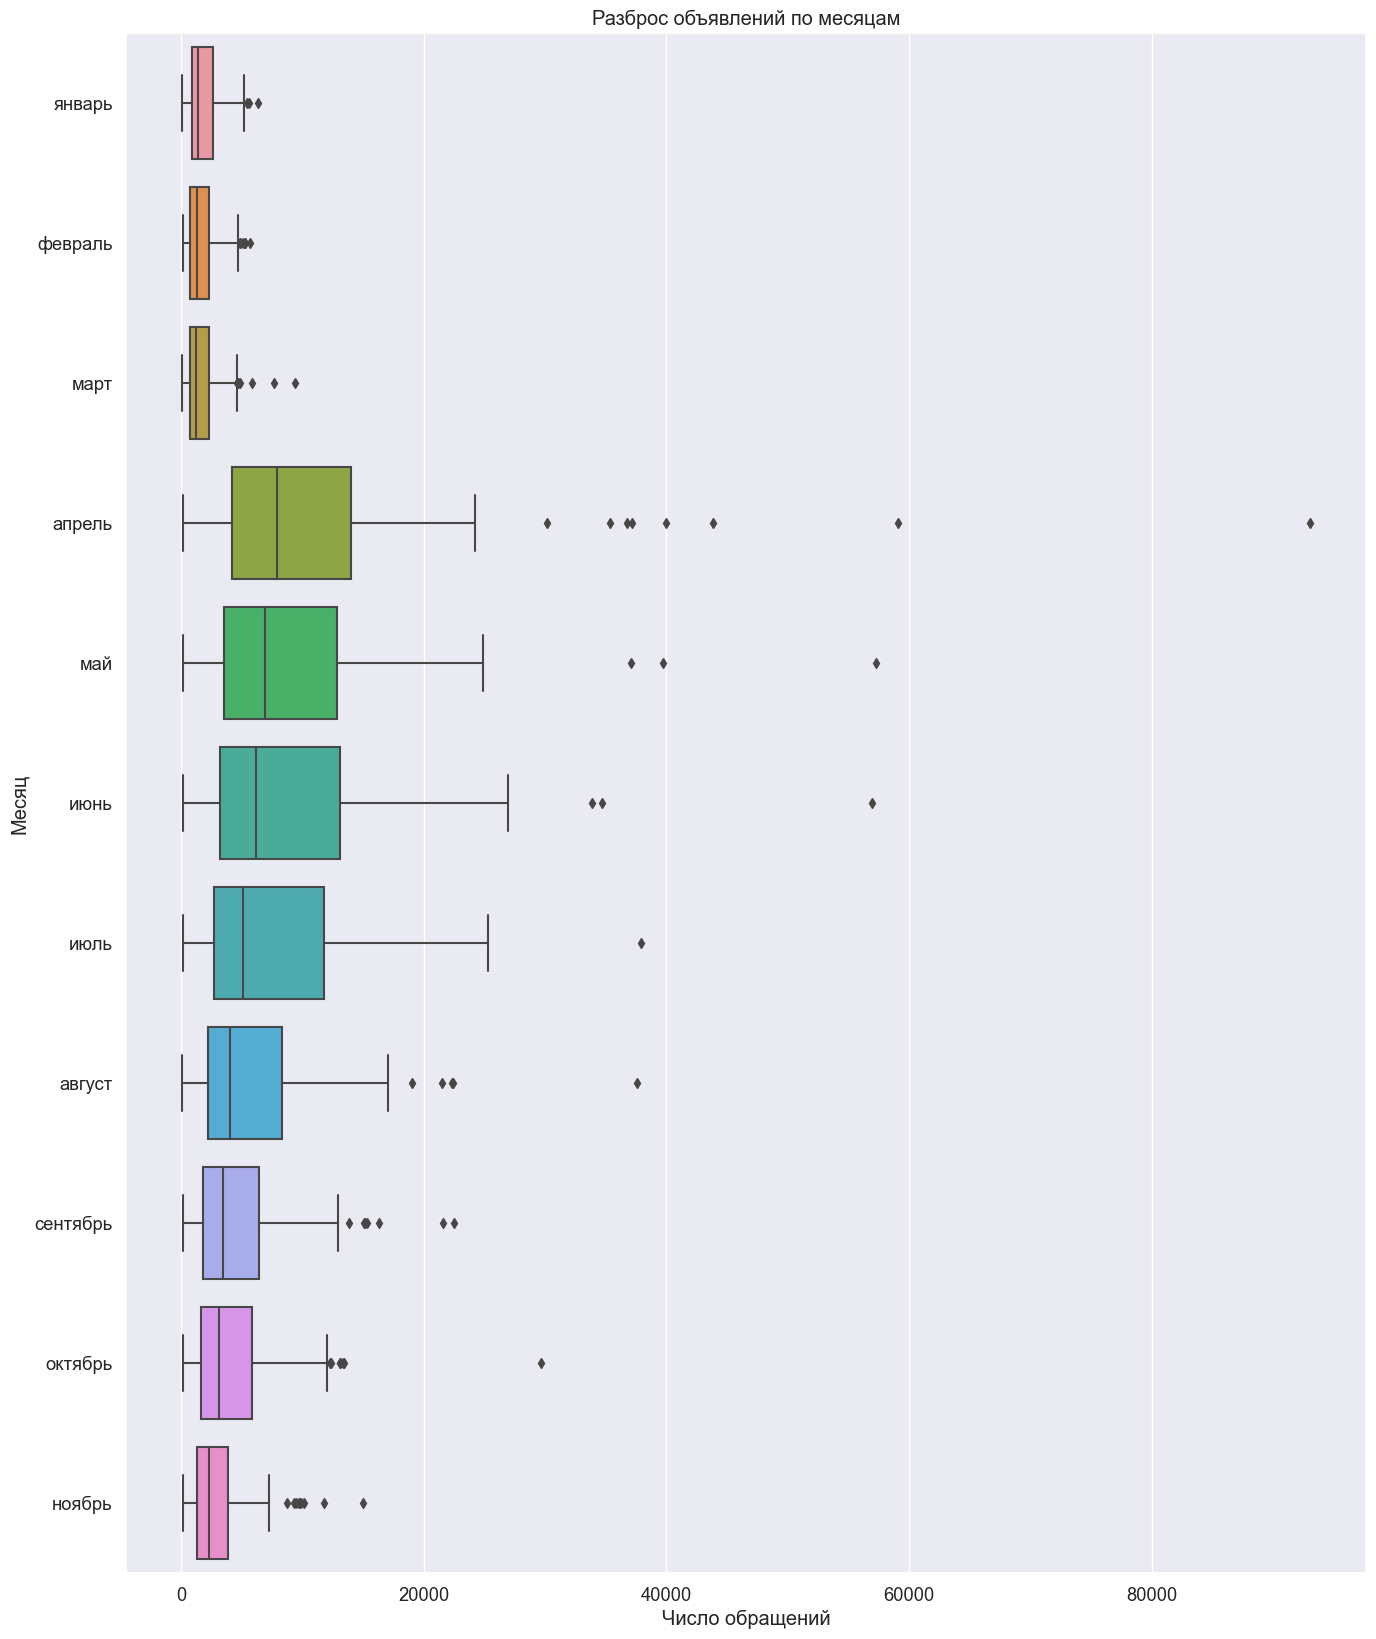

In [46]:
#6.4 определим разброс числа объявлений по регионам
#сгруппируем изначальный датасет по месяцу и региону, посчитав кол-во
group_data_without_december = data_without_december.groupby(['month','region'])['count'].sum().reset_index()
#заменим на названия месяцев
month_names = months = {1:'январь', 2:'февраль', 3:'март', 4:'апрель', 5:'май', 6:'июнь', 7:'июль', 8:'август', 9:'сентябрь', 10:'октябрь', 11:'ноябрь'}
group_data_without_december['month'] = group_data_without_december['month'].map(month_names)
#строим график
plt.figure(figsize=(16,20))
plot = sns.boxplot(x='count', y='month', data=group_data_without_december)
plt.title('Разброс объявлений по месяцам')
plt.xlabel('Число обращений')
plt.ylabel('Месяц')
plt.show()

Как видно из графика, наибольший разброс значений в апреле. Причина этого состоит в том, что именно с данного месяца началось активное распространение ковида-19 в России. Был введен карантин и другие ограничительные меры, что способствовало ухудшению занятости и увеличению обращений в службы занятости.

In [47]:
#6.5 определим число обращений в службу занятости в Северо-Западном федеральном округе по регионам
data_sz = data_without_december.query('district == "Северо-Западный федеральный округ"')
sz_by_region = data_sz.groupby('region')['count'].sum().reset_index()
sz_by_region = sz_by_region.sort_values(by='count', ascending=False)
print(f'Число обращений в службу занятости по округам в Северо-Западном округе: \n{sz_by_region.to_string(header=False, index=False)}')

Число обращений в службу занятости по округам в Северо-Западном округе: 
       г. Санкт-Петербург 156668
  Калининградская область  52451
      Вологодская область  50283
    Ленинградская область  49637
    Архангельская область  42056
          Республика Коми  36318
       Республика Карелия  27755
       Мурманская область  23166
     Новгородская область  20088
        Псковская область  17499
Ненецкий автономный округ   1877


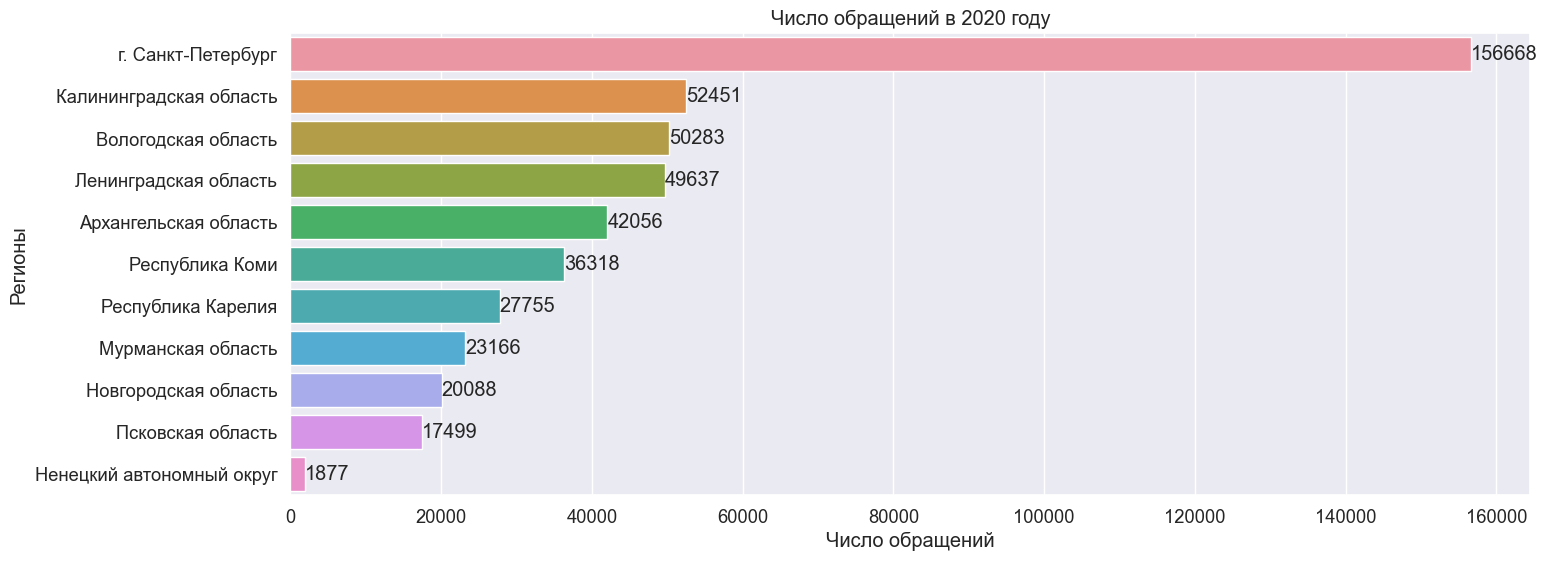

In [48]:
#построим график
plt.figure(figsize=(16, 6))
plot = sns.barplot(data=sz_by_region, x='count', y='region')
plot.bar_label(plot.containers[0])
#название и подписи осей
plt.title('Число обращений в 2020 году')
plt.xlabel('Число обращений')
plt.ylabel('Регионы')
plt.show()

Аналогичное объяснение можно дать по этому пункту. В Северо-Западном регионе наиболее крупным городом является Санкт-Петербург. Из-за превышения числа людей, которые проживают в Северной столице, этот город становится лидером по числу обращений в службу занятости. 

In [49]:
#6.6 определим процент трудоустройства по федеральным округам
data_employed = data_without_december.query('find_new_job == True')
employed_by_district = data_employed.groupby('district')['count'].sum().reset_index()
#посчитаем общее число
total_employed = employed_by_district['count'].sum()
#посчитаем процент
employed_by_district['percentage'] = employed_by_district['count'] / total_employed * 100
employed_by_district = employed_by_district.sort_values(by='count', ascending=False)
print('Процент трудоустройства по округам: \n', employed_by_district[['district', 'percentage']].to_string(index=False, header=False, formatters={'percentage': '{:.2f}%'.format}))

Процент трудоустройства по округам: 
       Центральный федеральный округ 23.88%
      Приволжский федеральный округ 22.94%
        Сибирский федеральный округ 16.60%
            Южный федеральный округ  9.91%
  Северо-Западный федеральный округ  9.60%
        Уральский федеральный округ  8.46%
  Дальневосточный федеральный округ  4.94%
Северо-Кавказский федеральный округ  3.68%


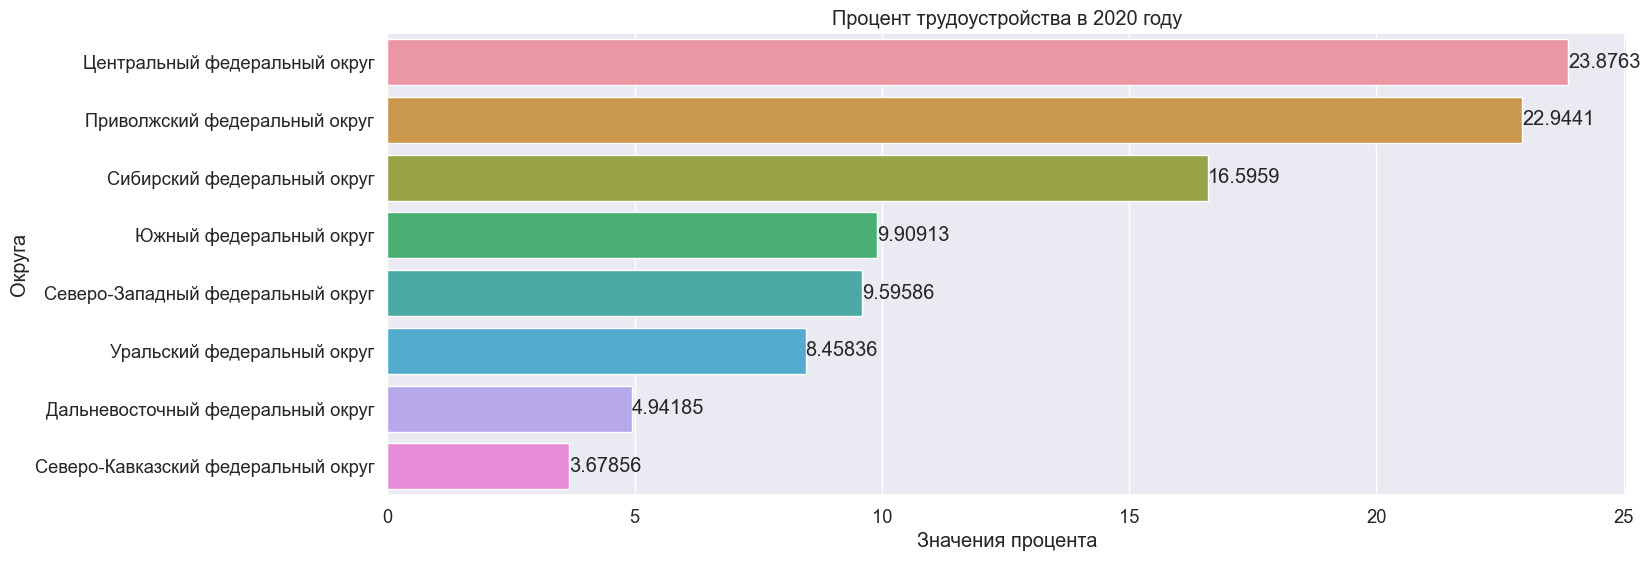

In [50]:
#построим график
plt.figure(figsize=(16, 6))
plot = sns.barplot(data=employed_by_district, x='percentage', y='district')
plot.bar_label(plot.containers[0])
#название и подписи осей
plt.title('Процент трудоустройства в 2020 году')
plt.xlabel('Значения процента')
plt.ylabel('Округа')
plt.show()

Теперь посмотрим соотношение трудоустройства по Федеральным округам.

In [51]:
#6.1 создаем сводную таблицу для подсчета числа безработных и нашедших работу по округам
pivot_table = data_without_december.pivot_table(index='district', columns='find_new_job', values='count', aggfunc='sum')
#переименуем столбцы
pivot_table = pivot_table.rename(columns={0: 'unemployed', 1: 'employed'})
#добавим процентное соотношение трудоустройств
for i in pivot_table.index:
    #определяем общее значение для каждого ФО
    total = data_without_december[data_without_december['district']==i]['count'].sum()
    #добавляем новые столбцы
    pivot_table.loc[i, 'unemployed_percent'] = round(pivot_table.loc[i, 'unemployed'] / total * 100, 2)
    pivot_table.loc[i, 'employed_percent'] = round(pivot_table.loc[i, 'employed'] / total * 100, 2)
pivot_table.reset_index()

find_new_job,district,unemployed,employed,unemployed_percent,employed_percent
0,Дальневосточный федеральный округ,235005,54219,81.25,18.75
1,Приволжский федеральный округ,796807,251729,75.99,24.01
2,Северо-Западный федеральный округ,372518,105280,77.97,22.03
3,Северо-Кавказский федеральный округ,660970,40359,94.25,5.75
4,Сибирский федеральный округ,535995,182080,74.64,25.36
5,Уральский федеральный округ,368423,92800,79.88,20.12
6,Центральный федеральный округ,767625,261956,74.56,25.44
7,Южный федеральный округ,487177,108717,81.76,18.24


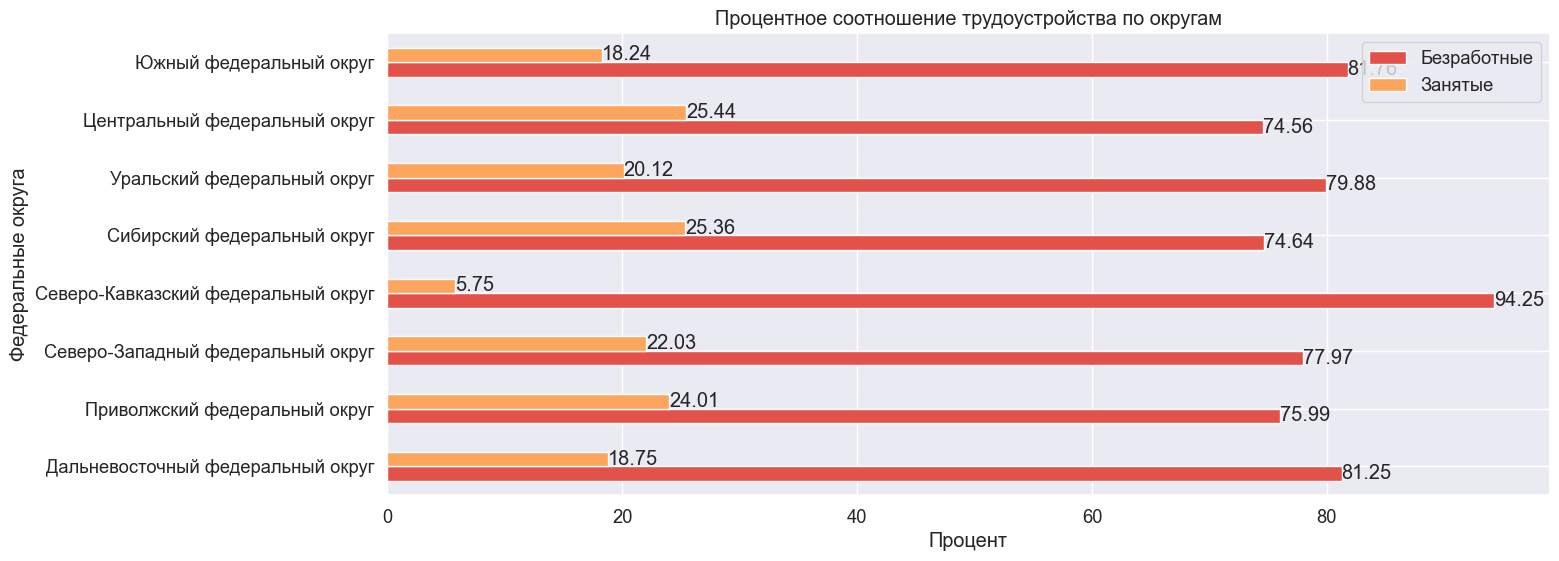

In [52]:
#построим график
plot = pivot_table[['unemployed_percent', 'employed_percent']].plot(kind='barh', figsize=(15, 6))
#создаем метки
for i in plot.containers:
    plt.bar_label(i)
plt.title('Процентное соотношение трудоустройства по округам')
plt.xlabel('Процент')
plt.ylabel('Федеральные округа')
plt.legend(['Безработные', 'Занятые'])
plt.show()

Процент трудоустройства больше в Центральном округе. Там наиболее высокая плотность населения, а следовательно больше рабочих мест и, как следствие, больше число трудоустройств даже в период пандемии. Поддержка малых бизнесов, которые в основном были подвержены риску банкротства во время ковида и, соответственно, сокращению рабочих мест, также наиболее заметна в центральной России (особенно в Москве).  

In [53]:
#6.7 определим процент по регионам для каждого федерального округа в цикле
for district in data_without_december['district'].unique():
    data_employed = data_without_december.query('find_new_job == True and district == @district')
    employed_by_district = data_employed.groupby('region')['count'].sum().reset_index()
    #посчитаем общее число
    total_employed = employed_by_district['count'].sum()
    #посчитаем процент
    employed_by_district['percentage'] = employed_by_district['count'] / total_employed * 100
    employed_by_district = employed_by_district.sort_values(by='count', ascending=False)
    print(f'Для округа "{district}" процент:')
    print(employed_by_district[['region', 'percentage']].to_string(index=False, header=False, formatters={'percentage': '{:.2f}%'.format} ))

Для округа "Дальневосточный федеральный округ" процент:
          Забайкальский край 16.79%
             Приморский край 16.54%
    Республика Саха (Якутия) 15.59%
            Амурская область 13.55%
          Республика Бурятия 12.98%
            Хабаровский край 12.55%
         Сахалинская область  4.19%
             Камчатский край  3.39%
Еврейская автономная область  2.77%
         Магаданская область  1.31%
  Чукотский автономный округ  0.34%
Для округа "Приволжский федеральный округ" процент:
         Республика Башкортостан 14.93%
Республика Татарстан (Татарстан) 12.55%
                   Пермский край  9.88%
               Самарская область  9.75%
              Пензенская область  8.48%
           Нижегородская область  8.22%
             Саратовская область  7.14%
            Оренбургская область  7.02%
  Чувашская Республика - Чувашия  5.48%
               Кировская область  5.20%
           Удмуртская Республика  4.42%
             Ульяновская область  3.33%
             Рес

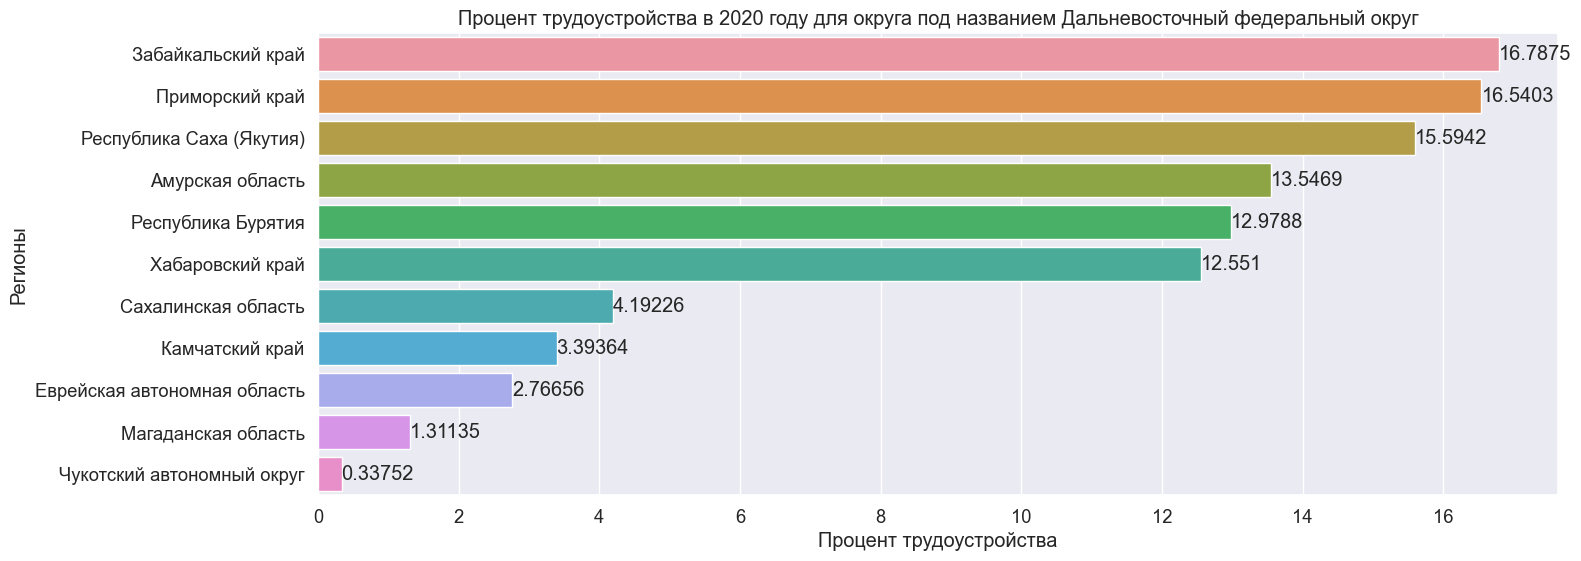

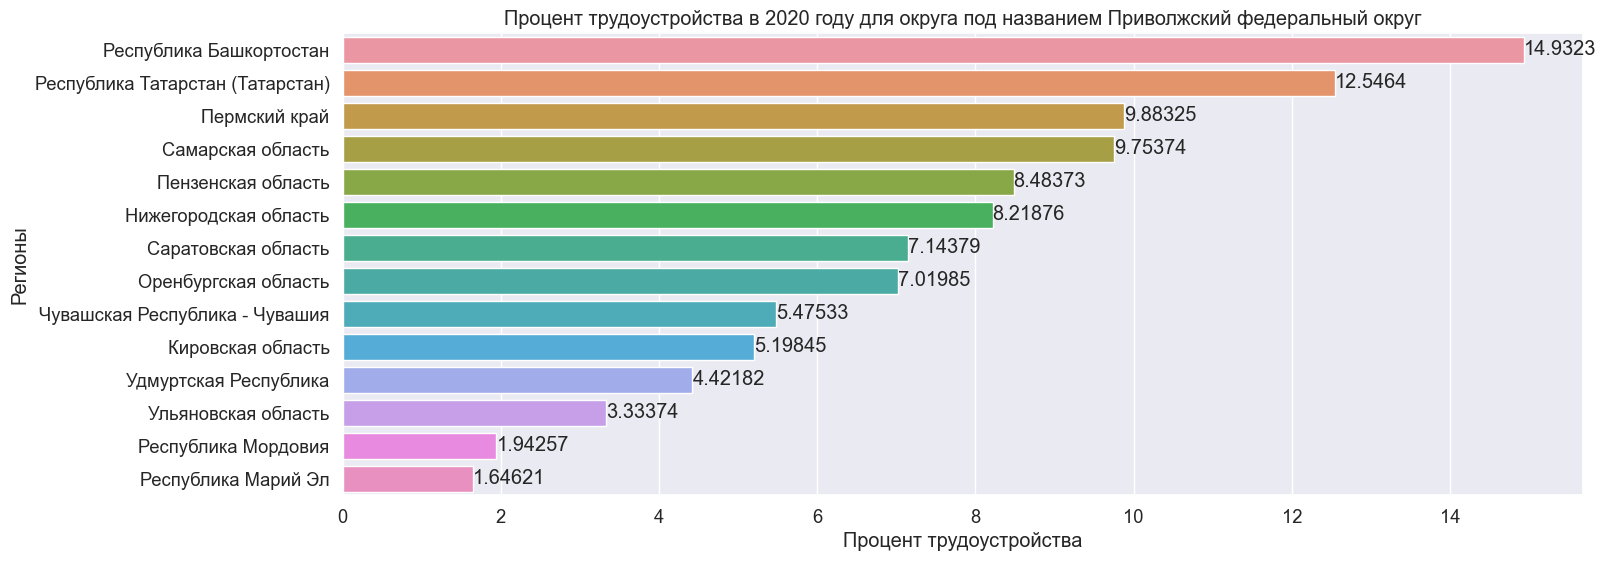

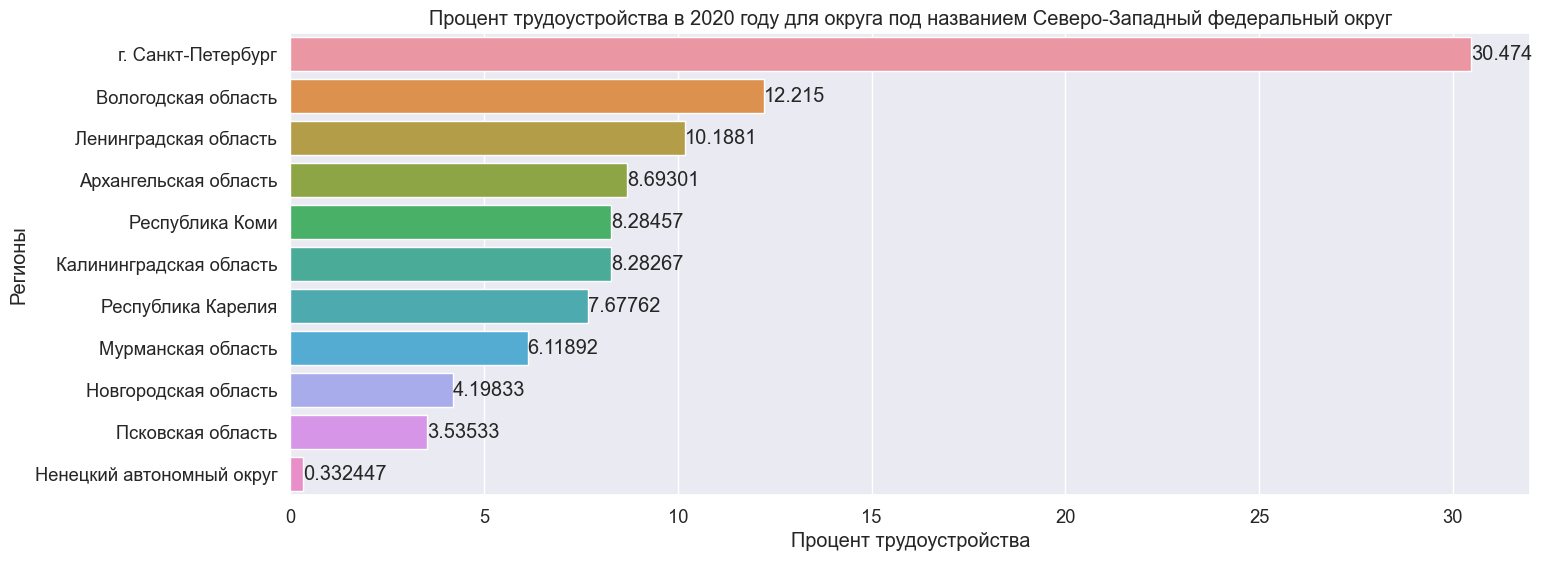

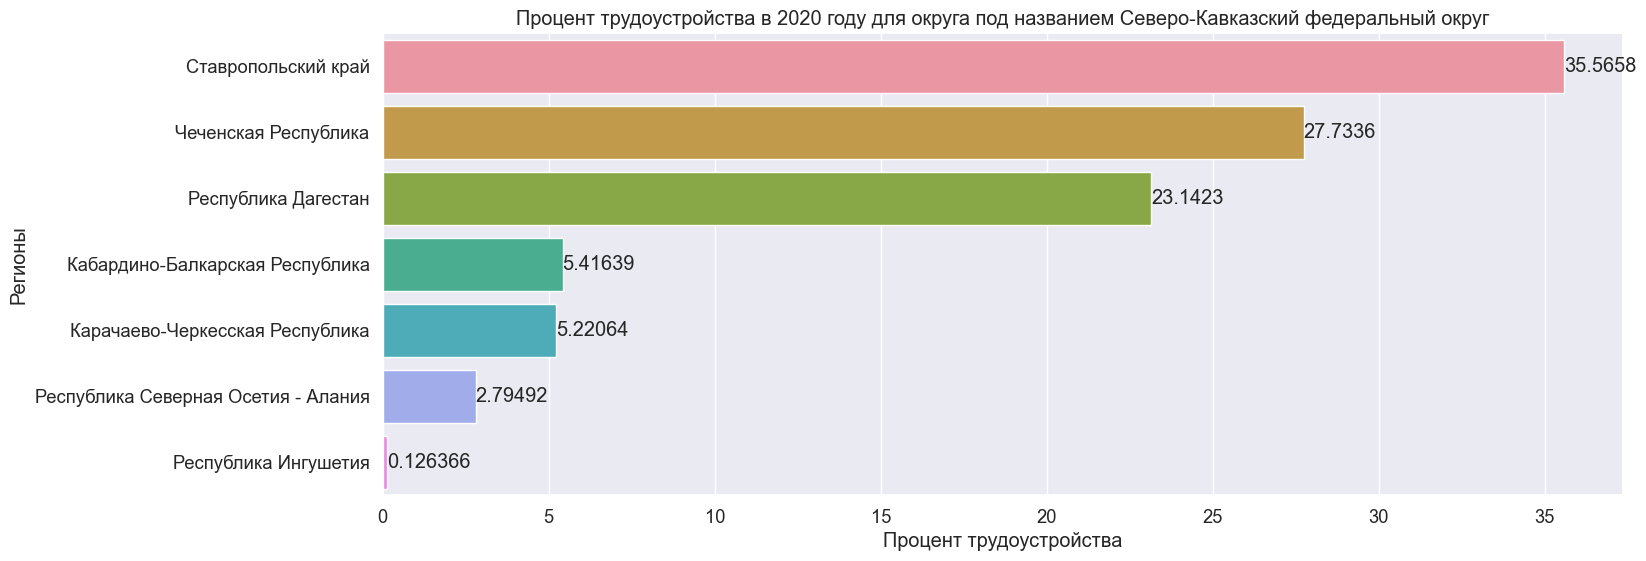

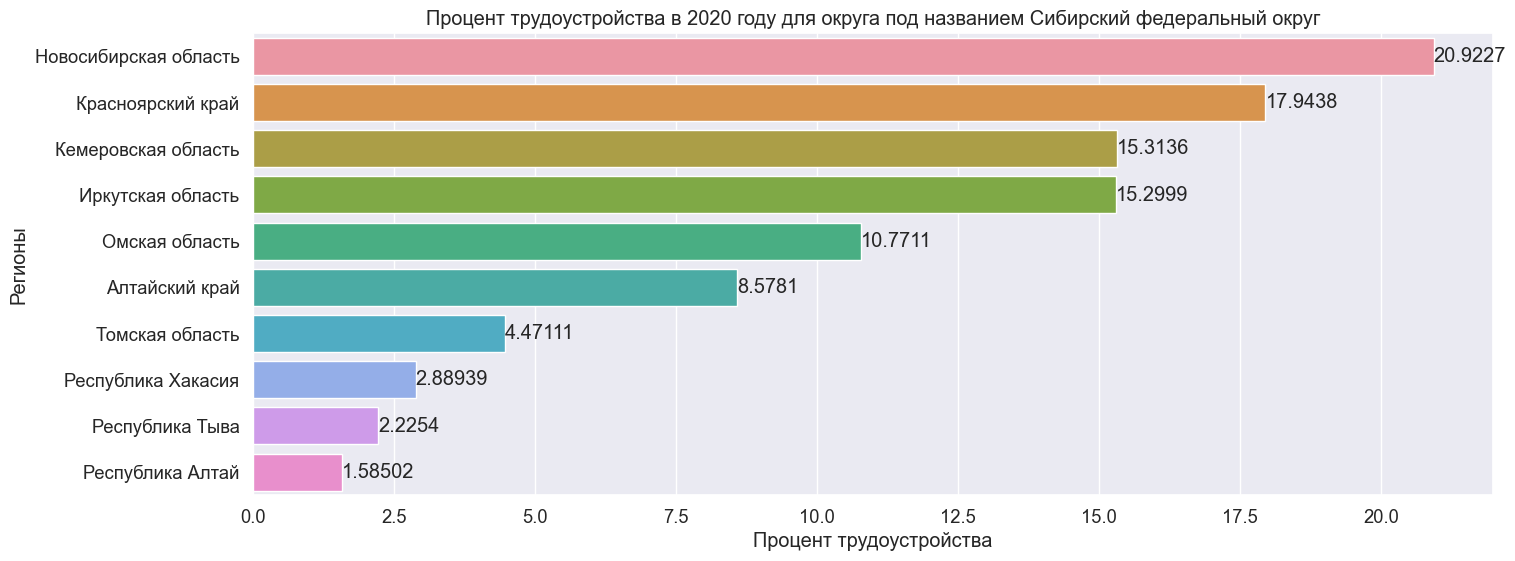

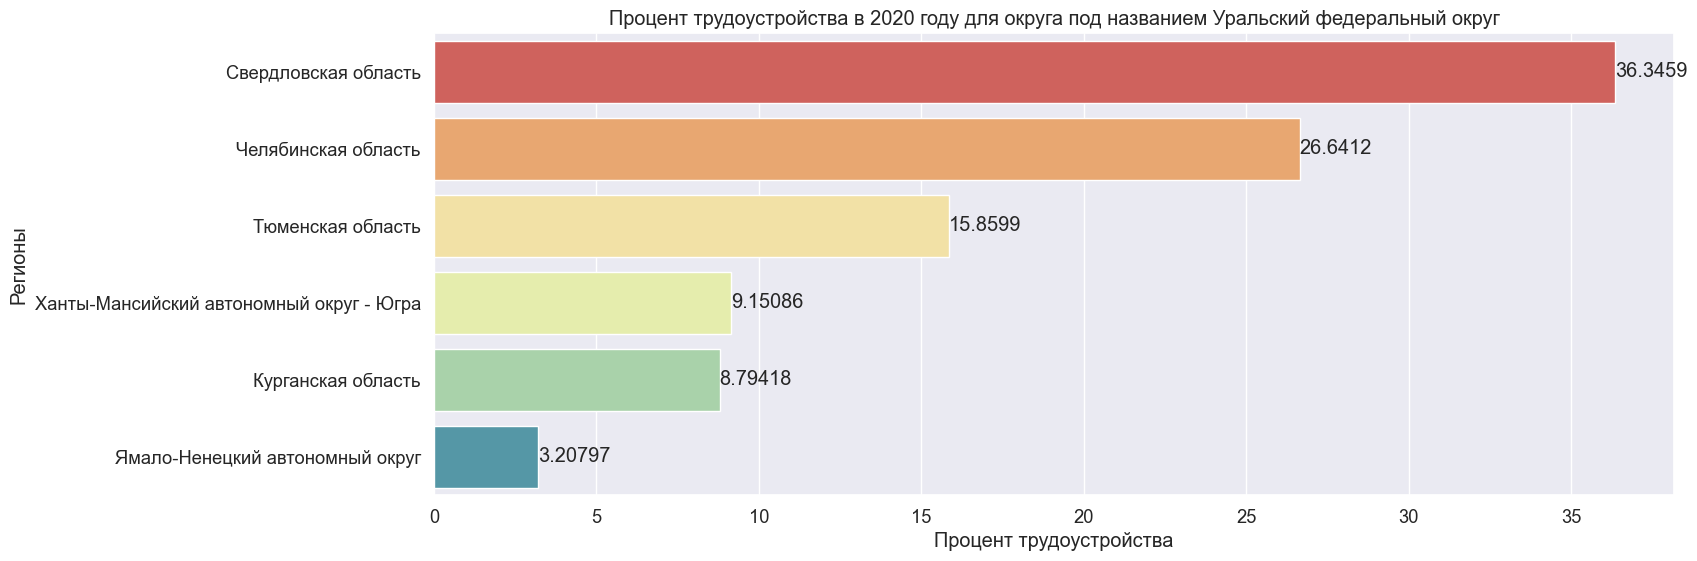

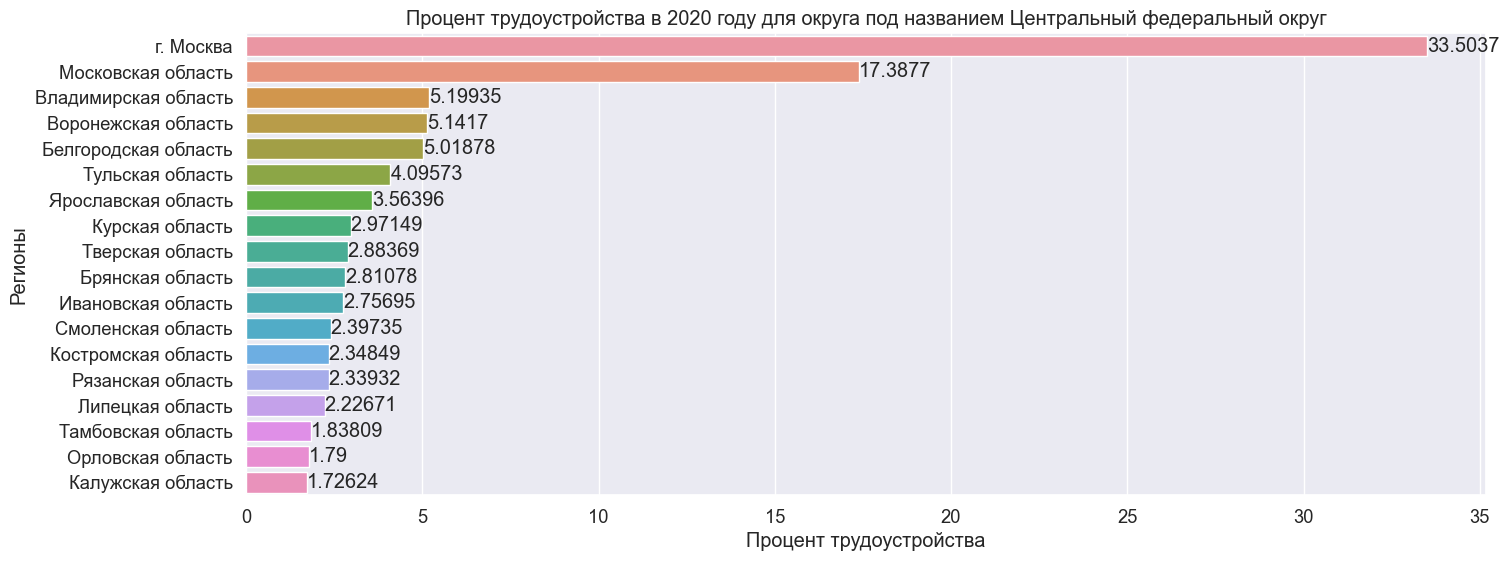

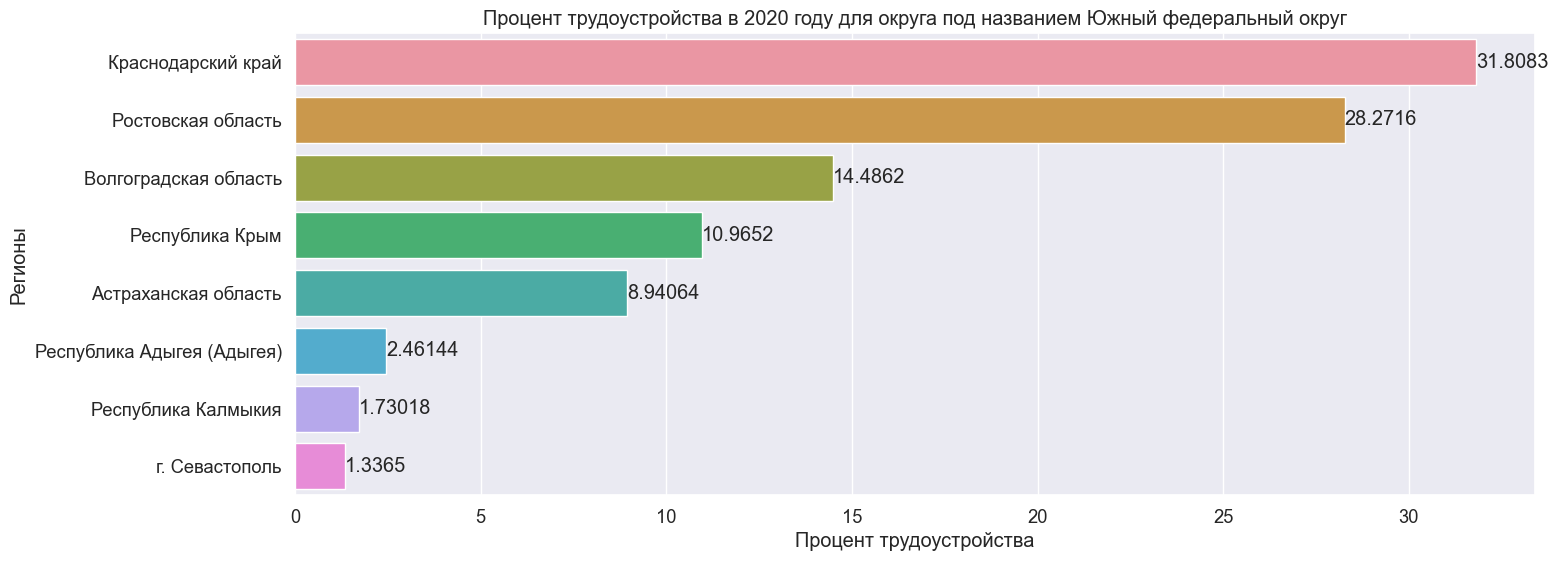

In [54]:
#6.7 добавим в цикл вывод графиков
for district in data_without_december['district'].unique():
    data_employed = data_without_december.query('find_new_job == True and district == @district')
    employed_by_district = data_employed.groupby('region')['count'].sum().reset_index()
    #посчитаем общее число
    total_employed = employed_by_district['count'].sum()
    #посчитаем процент
    employed_by_district['percentage'] = employed_by_district['count'] / total_employed * 100
    employed_by_district = employed_by_district.sort_values(by='count', ascending=False)
    #построим график
    plt.figure(figsize=(16, 6))
    plot = sns.barplot(data=employed_by_district, x='percentage', y='region')
    plot.bar_label(plot.containers[0])
    #название и подписи осей
    plt.title(f'Процент трудоустройства в 2020 году для округа под названием {district}')
    plt.xlabel('Процент трудоустройства')
    plt.ylabel('Регионы')
    plt.show()

Другой вариант*

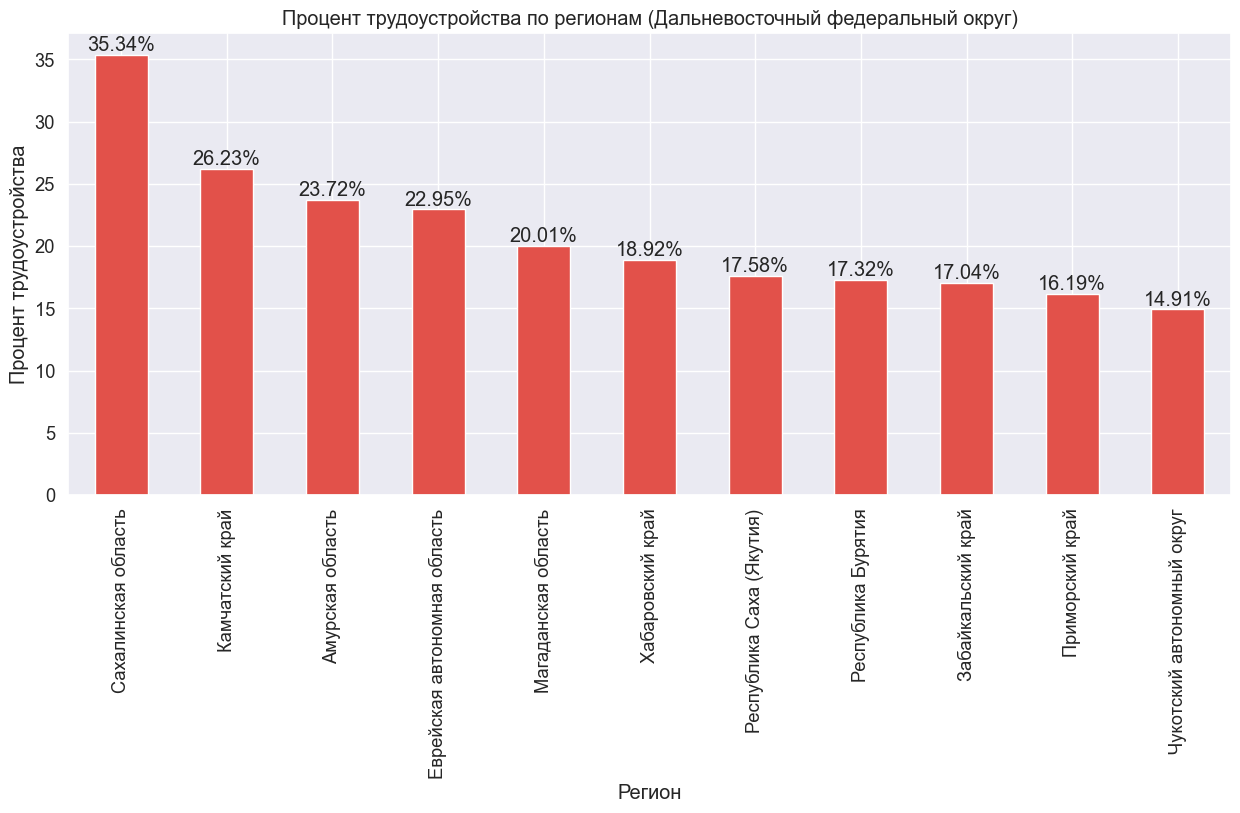

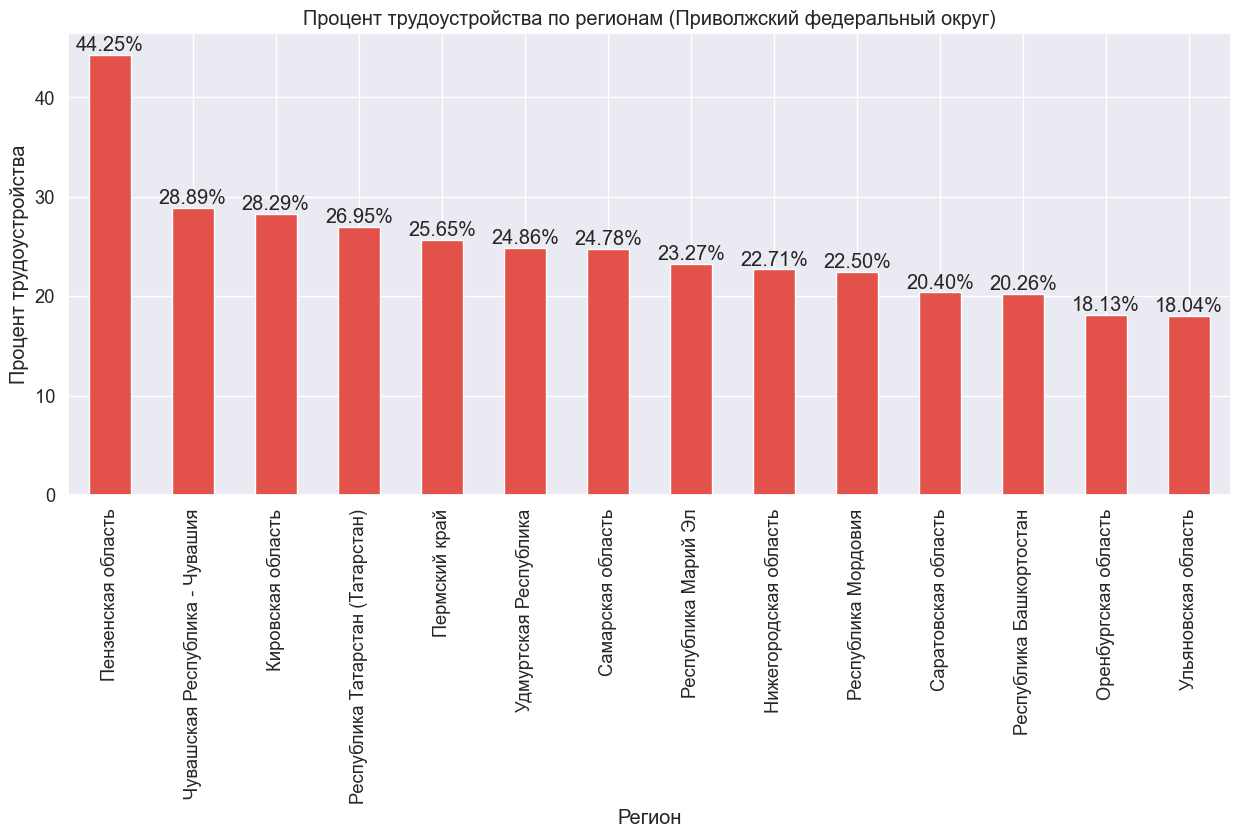

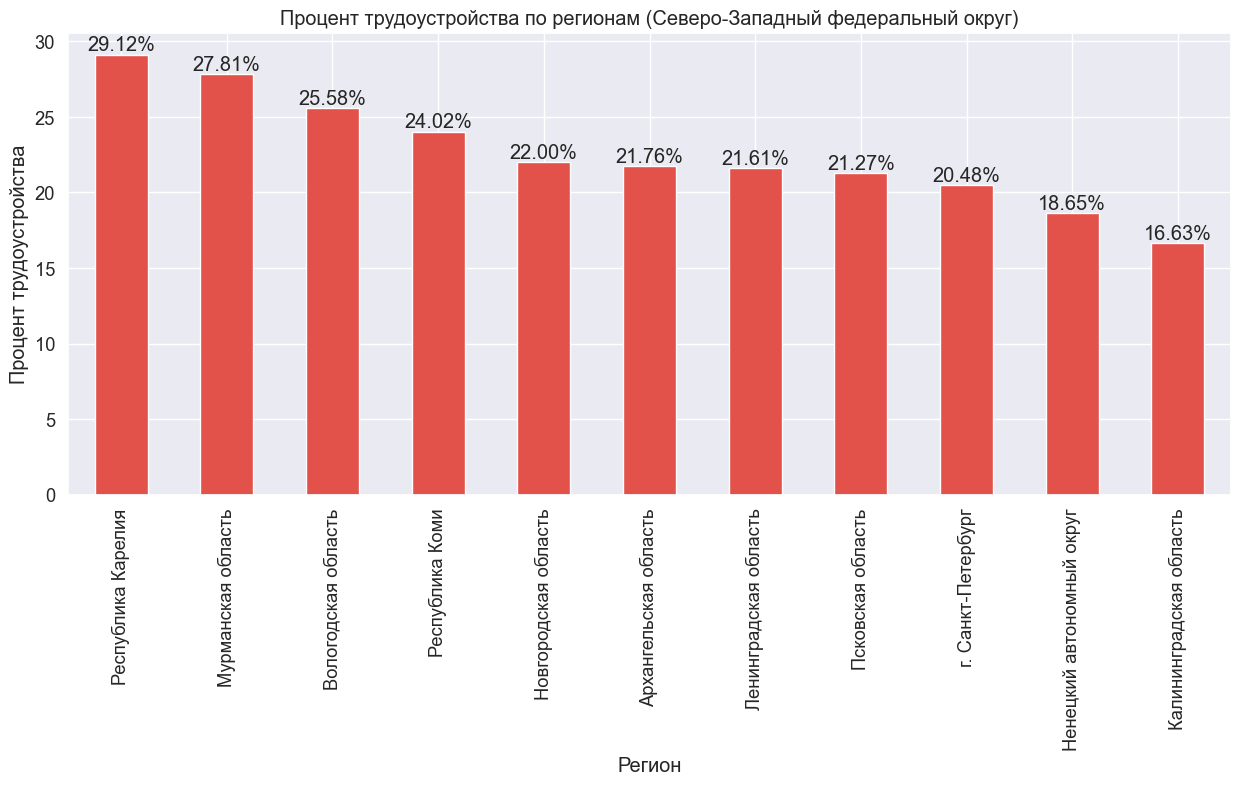

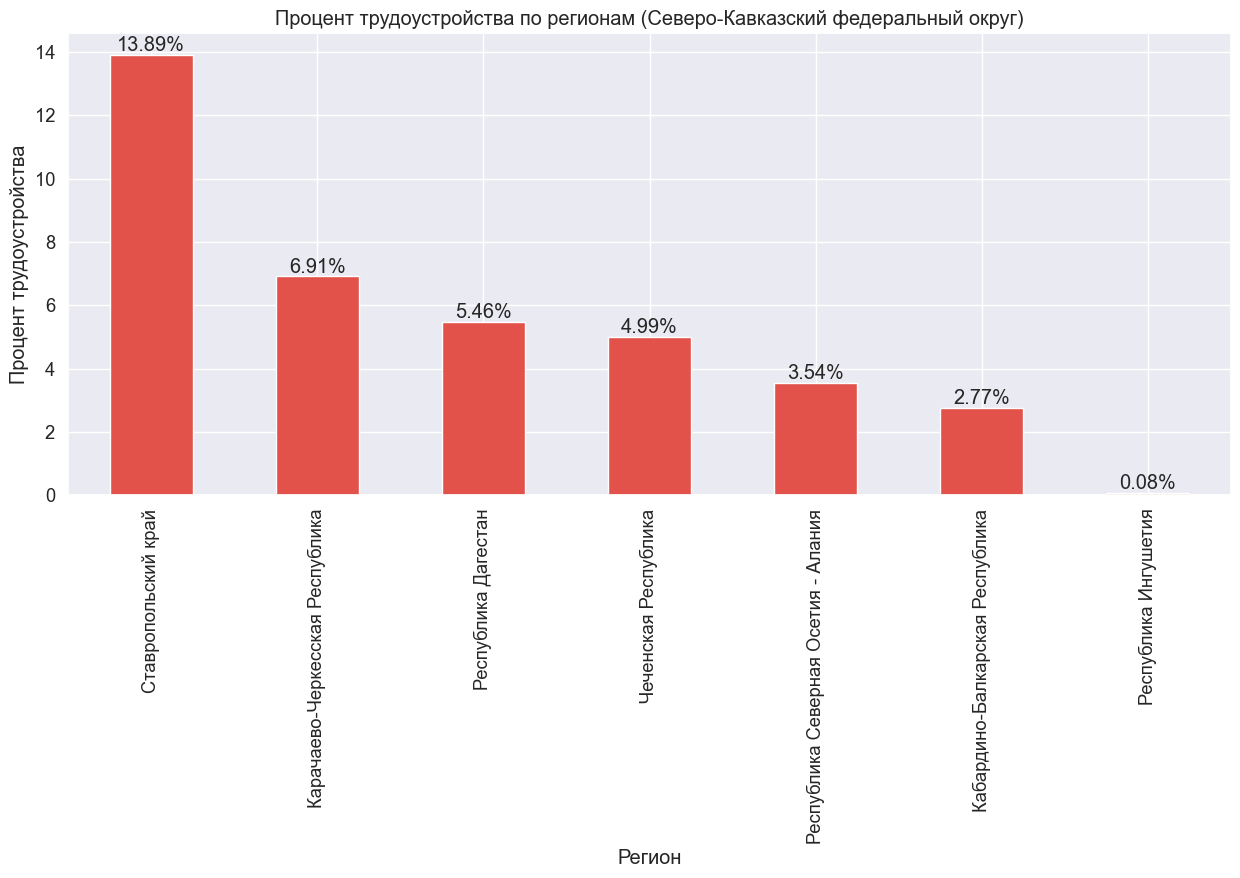

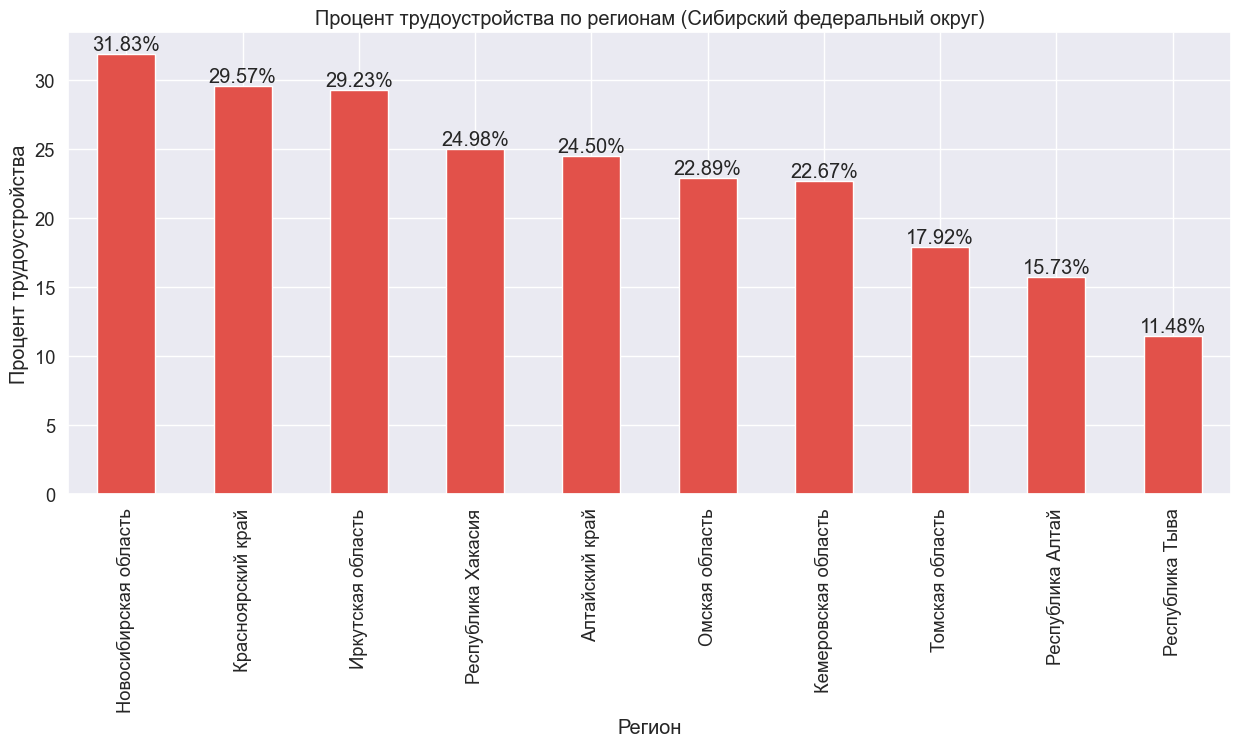

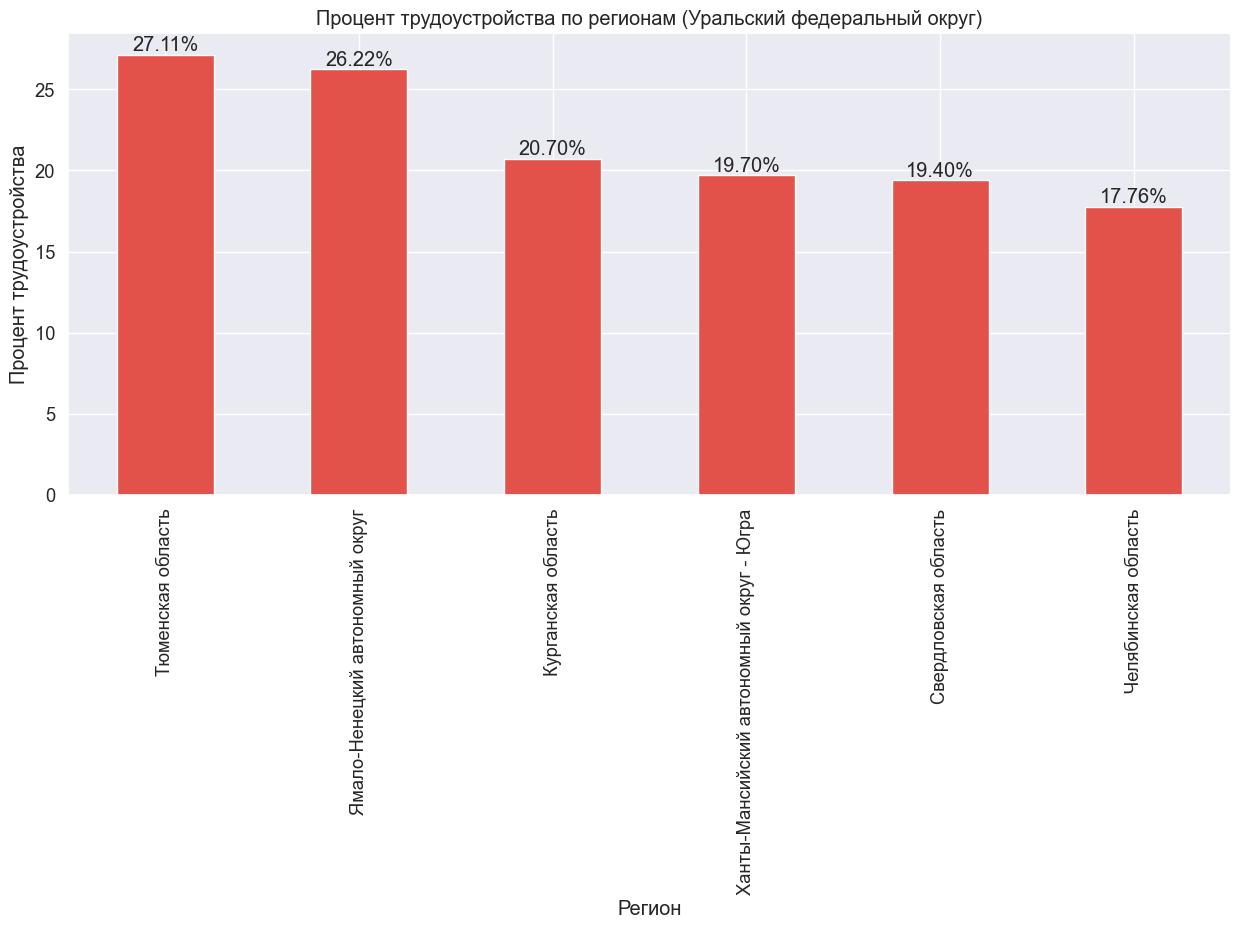

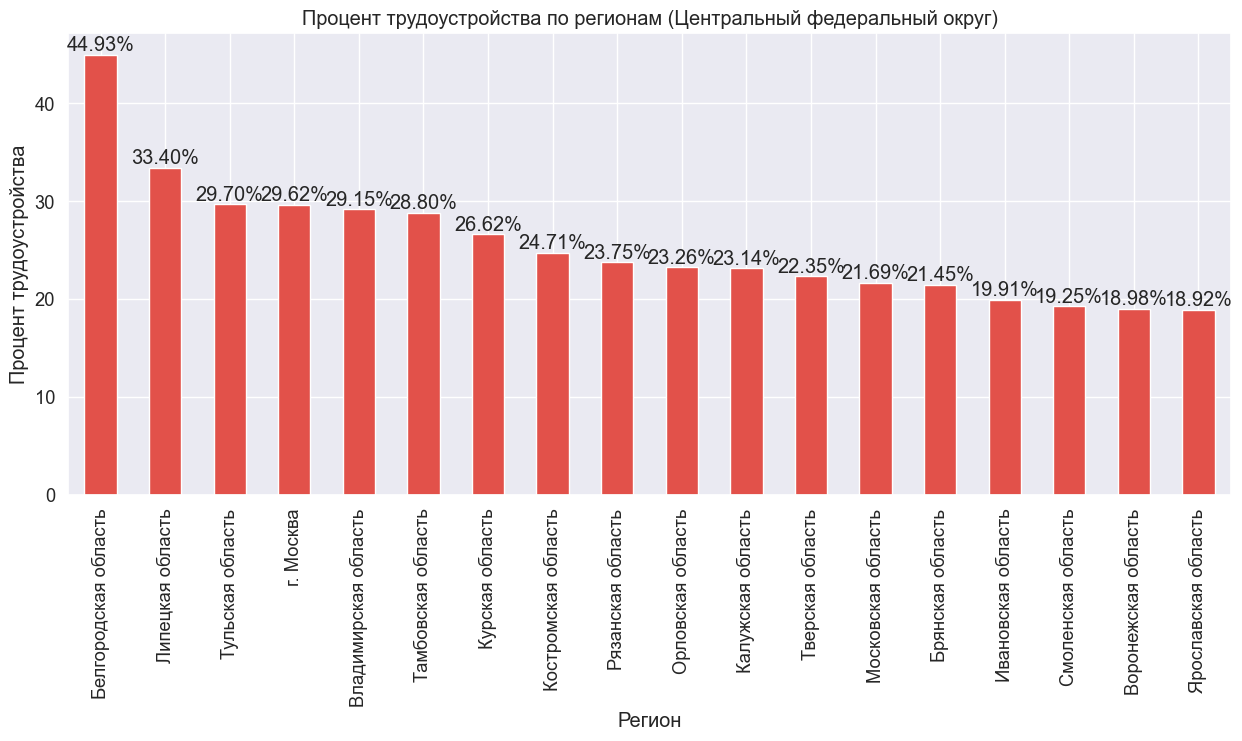

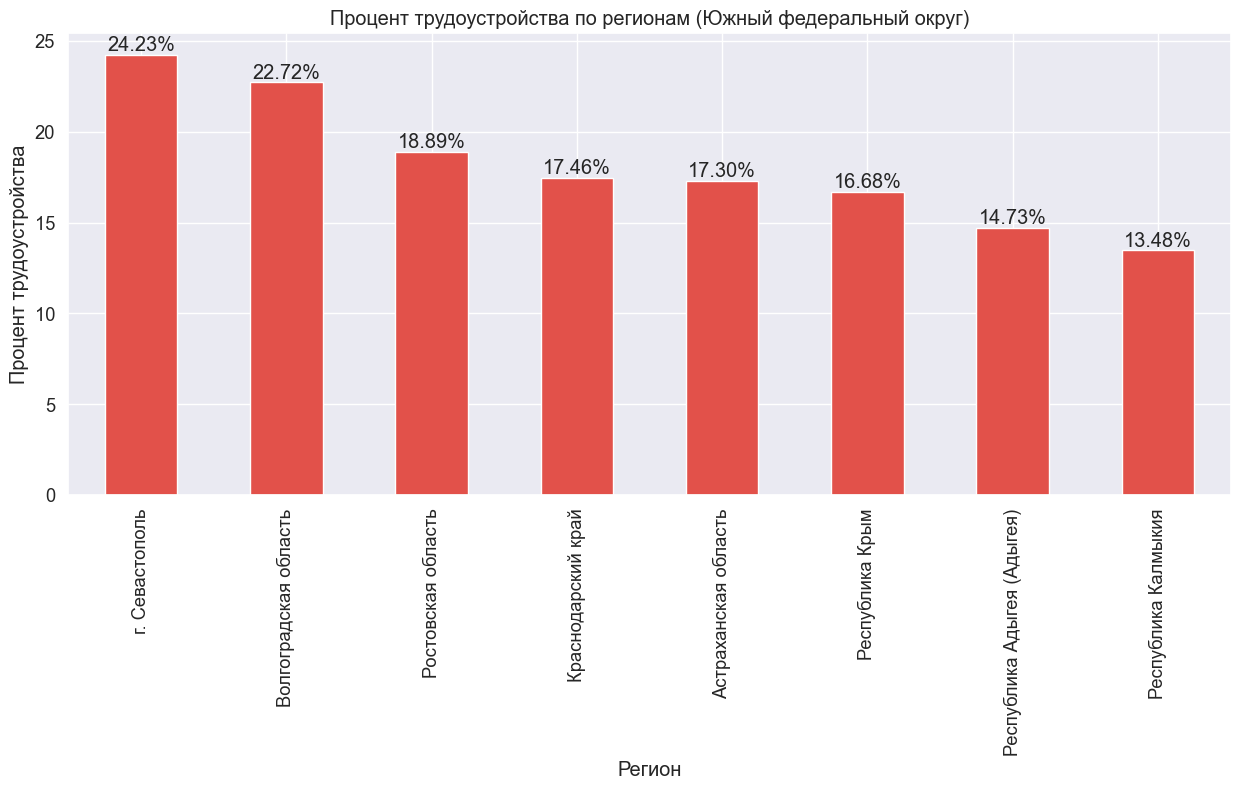

In [66]:
#сгрупптруем по отобранному датасету и применим к столбцу count сумму
data_w = (data_without_december.groupby(['district','region', 'find_new_job']).agg({'count':'sum'}))
data_w = data_w.reset_index()
data_w['perc'] = data_w['count']/data_w['count'].sum()
#цикл по каждому федеральному округу
for district in data_w['district'].unique():
    #отберем каждый ФО
    district_data = data_w[data_w['district'] == district]
    #сгруппируем по регионам
    grouped_data = district_data.groupby(['region', 'find_new_job'])['perc'].sum().reset_index()
    pivot_table = grouped_data.sort_values(by='find_new_job').pivot(index='region', columns='find_new_job', values='perc')
    pivot_table.rename(columns={0: 'unemployed', 1: 'employed'}, inplace=True)
    pivot_table['employment_perc'] = (pivot_table['employed'] / (pivot_table['unemployed'] + pivot_table['employed'])) * 100
    #построим график
    plot = pivot_table['employment_perc'].sort_values(ascending=False).plot(kind='bar', figsize=(15, 6))
    for container in plot.containers:
        plot.bar_label(container, fmt='%.2f%%')
    #название и подписи осей
    plot.set_xlabel('Регион')
    plot.set_ylabel('Процент трудоустройства')
    plot.set_title(f'Процент трудоустройства по регионам ({district})')
    plt.xticks(rotation=90)
    plt.show()
 

Проанализировав процент трудоустройства по регионам для остальным округов, можно сделать такой вывод: </br> <b>Численность населения прямо пропорциональна числу трудоустройств. </b>

<b>Вывод:</b>
1. Наблюдается резкий скачок числа обращений в службу занятости в апреле из-за активного распространения пандемии.
2. Процентное соотношение числа трудоустроенных меньше 50%. Наглядно видно увеличение безработных граждан.
3. Численность населения прямо пропорциональна числу трудойстройств. 
4. Разброс значений зависит от количества проживающих в городе.

--------------------------------------------------------------------------------------------------------------------------------

<b>ОБЩИЙ ВЫВОД</b></br>
Как можно заметить, большое влияние на число обращений в сулжбу занятости, соотношение числа безработных и занятых, динамику кол-ва обращений оказала пандемия covid-19. Именно этот фактор лежит в основе различий, наблюдаемых по разным параметрам. Проведенный анализ мною анализ подтверждает данное предположение.